In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmo
import cartopy.crs as ccrs
from astropy.time import Time
from matplotlib import path
import numpy as np

In [2]:
latitude_min = 39.34574938159044
latitude_max = 39.557085111198106
longitude_min = -74.34232329625868
longitude_max = -74.1374115693204

box_coords = [
    (39.34574938159044, -74.2979018729364),
    (39.528354620427535, -74.1374115693204),
    (39.557085111198106, -74.18398241635184),
    (39.37400145851776, -74.34232329625868)
]

box_intersect = np.array([[-74.2979018729364,-74.1374115693204,-74.18398241635184,-74.34232329625868],
                      [39.34574938159044,39.528354620427535,39.557085111198106,39.37400145851776]])

depth_min = 7
depth_max = 10

molar_mass_oxygen = 32 

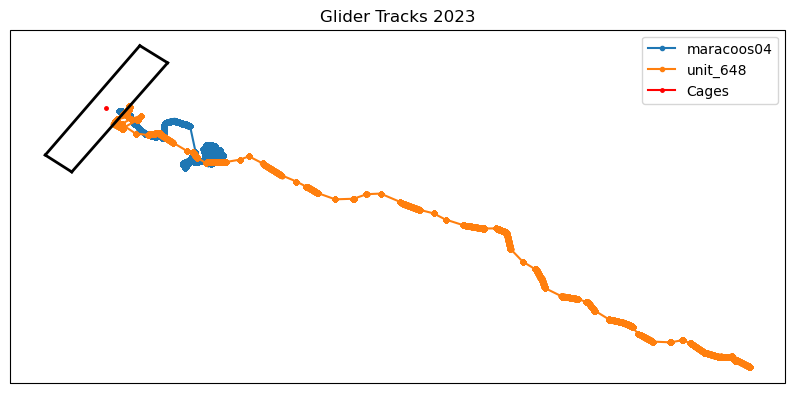

In [3]:
urls2023 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/maracoos_04-20230221T1724-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Coxygen_saturation%2Coxygen_saturation_optimal_shift%2Coxygen_saturation_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2023-03-13T00%3A00%3A00.00Z&time%3C=2023-03-20T15%3A53%3A41.78Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/unit_648-20230324T1507-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cinstrument_ctd%2Cinstrument_optode%2Cinstrument_suna%2Cm_pitch%2Cm_roll%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_m_present_secs_into_mission%2Csci_m_present_time%2Csci_suna_nitrate_concentration%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cwater_depth&time%3E=2023-04-26T00%3A00%3A00.00Z&time%3C=2023-05-03T13%3A17%3A07.84Z',
]

url2023_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/maracoos_04-20230221T1724-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Coxygen_saturation%2Coxygen_saturation_optimal_shift%2Coxygen_saturation_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2023-03-13T00%3A00%3A00.00Z&time%3C=2023-03-20T15%3A53%3A41.78Z':'maracoos04',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/unit_648-20230324T1507-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cinstrument_ctd%2Cinstrument_optode%2Cinstrument_suna%2Cm_pitch%2Cm_roll%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_m_present_secs_into_mission%2Csci_m_present_time%2Csci_suna_nitrate_concentration%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cwater_depth&time%3E=2023-04-26T00%3A00%3A00.00Z&time%3C=2023-05-03T13%3A17%3A07.84Z':'unit_648',
}

data_by_url = {}

for url in urls2023:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2023_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

ax.plot(-74.24087, 39.4524, marker='.', markersize=5, color='red', label='Cages')

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

ax.set_title('Glider Tracks 2023')
ax.legend()

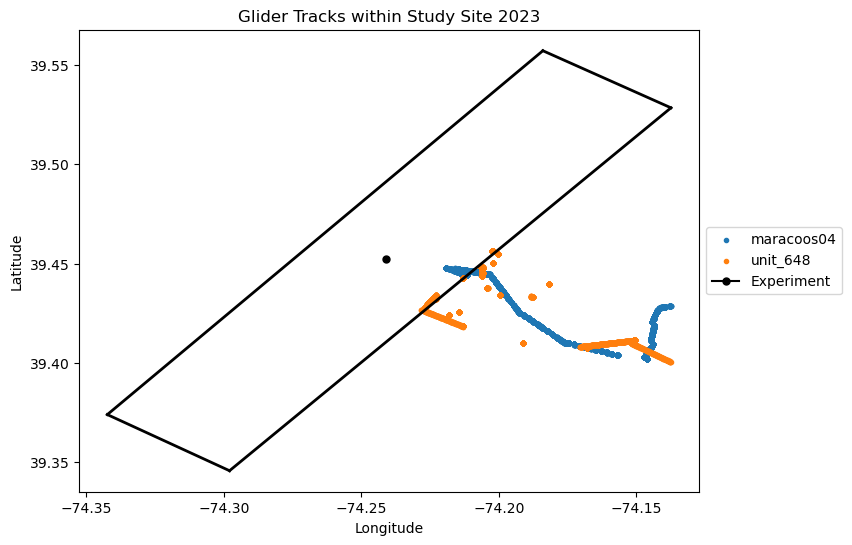

In [4]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2023_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):

    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2023')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [5]:
for url in urls2023:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature', 'oxygen_concentration'])
    data['time'] = pd.to_datetime(data['time'])
    
    # # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    # if 'oxygen_concentration' not in data.columns:
    #     data['oxygen_concentration'] = None

    data_by_url[url] = data

data2023 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2023 = data2023[(data2023['depth'] >= depth_min) & (data2023['depth'] <= depth_max)]
all_data_2023

time   latitude  longitude     depth  \
8     2023-03-13 00:14:16.250000+00:00  39.360720 -74.070335  7.879481   
10    2023-03-13 00:14:23.250000+00:00  39.360735 -74.070341  9.209238   
52    2023-03-13 00:17:21.250000+00:00  39.361103 -74.070487  9.209237   
53    2023-03-13 00:17:28.250000+00:00  39.361117 -74.070493  8.077952   
54    2023-03-13 00:17:35.250000+00:00  39.361132 -74.070499  7.284065   
...                                ...        ...        ...       ...   
40100 2023-05-03 13:15:05.100000+00:00  39.443936 -74.206026  7.929040   
40103 2023-05-03 13:15:13.170000+00:00  39.443936 -74.206023  9.308403   
40115 2023-05-03 13:16:10.460000+00:00  39.443938 -74.206008  9.735110   
40116 2023-05-03 13:16:18.500000+00:00  39.443938 -74.206006  8.325979   
40118 2023-05-03 13:16:26.550000+00:00  39.443938 -74.206004  7.006151   

                      trajectory  conductivity     density  \
8      maracoos_04-20230221T1724       3.27402  1025.60420   
10     maracoos_04-20230221T1724       3.27427  1025.61180   
52     maracoos_04-20230221T1724       3.27394  1025.61130   
53     maracoos_04-20230221T1724       3.27373  1025.60570   
54     maracoos_04-20230221T1724       3.27372  1025.60290   
...                          ...           ...         ...   
40100     unit_648-20230324T1507       3.51642  1023.12030   
40103     unit_648-20230324T1507       3.52046  1023.22424   
40115     unit_648-20230324T1507       3.51521  1023.24080   
40116     unit_648-20230324T1507       3.51824  1023.20416   
40118     unit_648-20230324T1507       3.51101  1022.99700   

       oxygen_concentration   salinity  temperature oxygen_saturation  
8                   297.517  32.580800       6.6029              None  
10                  297.515  32.582720       6.6031              None  
52                  297.425  32.581654       6.6004              None  
53                  297.390  32.580936       6.5993              None  
54                  297.379  32.581974       6.5985              None  
...                     ...        ...          ...               ...  
40100               258.427  30.443466      11.8504              None  
40103               258.701  30.550056      11.7671              None  
40115               254.678  30.553614      11.7010              None  
40116               254.501  30.529720      11.7663              None  
40118               254.689  30.312603      11.9477              None  

[2420 rows x 11 columns]

In [6]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2023.longitude,all_data_2023.latitude]).T)

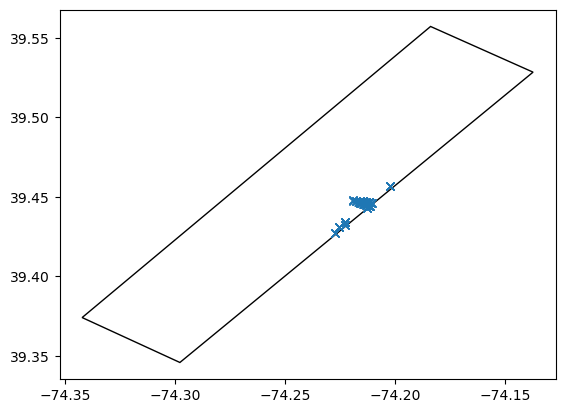

In [7]:
plt.plot(all_data_2023.longitude[mask],all_data_2023.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [8]:
data2023 = all_data_2023[mask]

data2023['time'] = pd.to_datetime(data2023['time'])
data2023

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\699291221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2023['time'] = pd.to_datetime(data2023['time'])


time   latitude  longitude     depth  \
22796 2023-03-20 11:52:11.740000+00:00  39.446299 -74.210726  7.631332   
22797 2023-03-20 11:52:18.740000+00:00  39.446302 -74.210739  8.832075   
22800 2023-03-20 11:52:25.740000+00:00  39.446305 -74.210751  9.883960   
22814 2023-03-20 11:53:28.740000+00:00  39.446330 -74.210865  9.169473   
22815 2023-03-20 11:53:35.740000+00:00  39.446333 -74.210878  8.534370   
...                                ...        ...        ...       ...   
39788 2023-05-03 10:00:15.750000+00:00  39.442880 -74.212872  8.266439   
39791 2023-05-03 10:00:23.800000+00:00  39.442880 -74.212872  9.645801   
39803 2023-05-03 10:00:56.990000+00:00  39.442884 -74.212870  9.715264   
39805 2023-05-03 10:01:05.010000+00:00  39.442885 -74.212869  8.385521   
39808 2023-05-03 10:01:13.040000+00:00  39.442886 -74.212868  7.105387   

                      trajectory  conductivity     density  \
22796  maracoos_04-20230221T1724       3.07469  1024.38420   
22797  maracoos_04-20230221T1724       3.08665  1024.44270   
22800  maracoos_04-20230221T1724       3.10432  1024.53300   
22814  maracoos_04-20230221T1724       3.09878  1024.49660   
22815  maracoos_04-20230221T1724       3.08698  1024.43310   
...                          ...           ...         ...   
39788     unit_648-20230324T1507       3.50838  1023.01050   
39791     unit_648-20230324T1507       3.53586  1023.41656   
39803     unit_648-20230324T1507       3.53453  1023.42200   
39805     unit_648-20230324T1507       3.51031  1023.06494   
39808     unit_648-20230324T1507       3.49796  1022.84814   

       oxygen_concentration   salinity  temperature oxygen_saturation  
22796               296.780  30.940128       5.9951              None  
22797               296.764  31.016489       6.0564              None  
22800               296.519  31.137049       6.1384              None  
22814               294.520  31.092422       6.1204              None  
22815               294.634  31.008038       6.0698              None  
...                     ...        ...          ...               ...  
39788                   NaN  30.314623      11.9136              None  
39791                   NaN  30.774578      11.6749              None  
39803                   NaN  30.776949      11.6565              None  
39805                   NaN  30.372757      11.8649              None  
39808                   NaN  30.135109      12.0126              None  

[129 rows x 11 columns]

In [9]:
gliders2023 = data2023.groupby(data2023['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()

gliders2023

time   latitude  longitude     depth                 trajectory  \
0  2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
1  2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
2  2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      3.087268  1024.436914            295.789589  31.013325     6.067368   
1      3.522183  1023.160573                   NaN  30.494229    11.859333   
2      3.535199  1023.387628            255.863375  30.748636    11.700737   

  oxygen_saturation  
0               NaN  
1               NaN  
2               NaN

In [10]:
gliders2023['time'] = pd.to_datetime(gliders2023['time'])
gliders2023['julian_day'] = Time(gliders2023['time']).jd

gliders2023 = pd.DataFrame(gliders2023)
gliders2023['time'] = pd.to_datetime(gliders2023['time'])
gliders2023['day_of_year'] = gliders2023['time'].dt.dayofyear
gliders2023.drop(columns=['julian_day'], inplace=True)

gliders2023['oxygen_concentration_mg_per_l'] = gliders2023['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2023

time   latitude  longitude     depth                 trajectory  \
0 2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
1 2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
2 2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      3.087268  1024.436914            295.789589  31.013325     6.067368   
1      3.522183  1023.160573                   NaN  30.494229    11.859333   
2      3.535199  1023.387628            255.863375  30.748636    11.700737   

  oxygen_saturation  day_of_year  oxygen_concentration_mg_per_l  
0               NaN           79                       9.465267  
1               NaN          122                            NaN  
2               NaN          123                       8.187628

(0.0, 365.0)

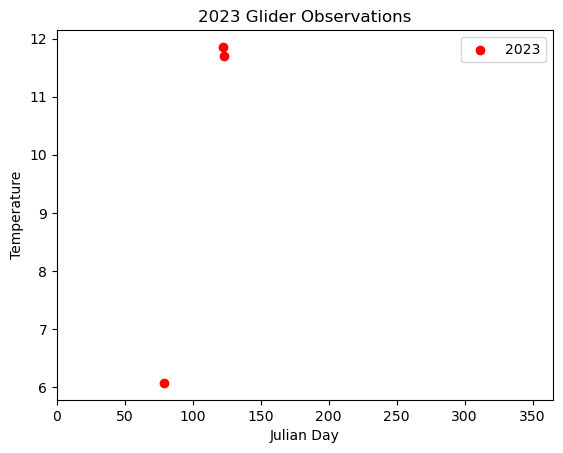

In [11]:
plt.scatter(gliders2023['day_of_year'], gliders2023['temperature'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2023 Glider Observations')
plt.legend()
plt.xlim(0,365)

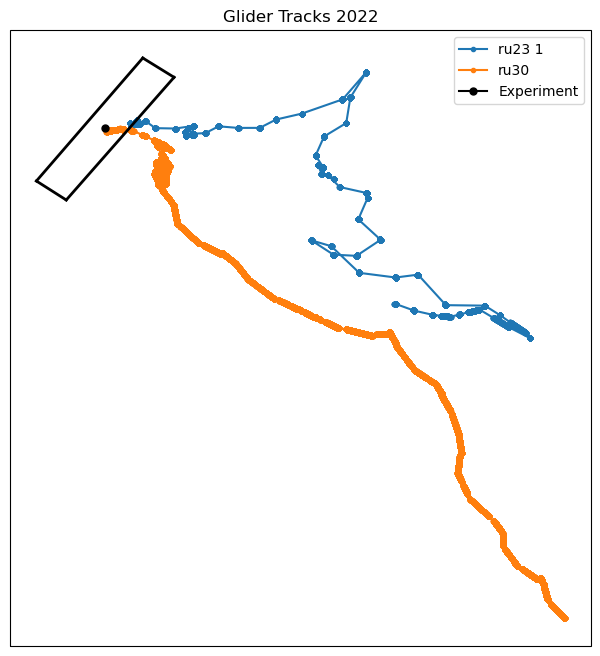

In [12]:
urls2022 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru23-20221011T1759-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_470nm%2Cbeta_532nm%2Cbeta_660nm%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cinstrument_bb3slo%2Cinstrument_ctd%2Cinstrument_fl3slo%2Cm_pitch%2Cm_roll%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_fl3slo_cdom_units%2Csci_fl3slo_chlor_units%2Csci_fl3slo_phyco_units%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-10-25T00%3A00%3A00.00Z&time%3C=2022-11-01T14%3A49%3A57.49Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20221011T1527-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cflbbcd_timestamp%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csbe41n_ph_electrode_current%2Csbe41n_ph_electrode_voltage%2Csbe41n_ph_ref_voltage%2Csbe41n_ph_substrate_current%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_sbe41n_ph_timestamp%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-10-31T00%3A00%3A00.00Z&time%3C=2022-11-07T19%3A21%3A01.00Z',
]

url2022_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru23-20221011T1759-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_470nm%2Cbeta_532nm%2Cbeta_660nm%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cinstrument_bb3slo%2Cinstrument_ctd%2Cinstrument_fl3slo%2Cm_pitch%2Cm_roll%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csci_fl3slo_cdom_units%2Csci_fl3slo_chlor_units%2Csci_fl3slo_phyco_units%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-10-25T00%3A00%3A00.00Z&time%3C=2022-11-01T14%3A49%3A57.49Z':'ru23 1',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20221011T1527-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cflbbcd_timestamp%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csbe41n_ph_electrode_current%2Csbe41n_ph_electrode_voltage%2Csbe41n_ph_ref_voltage%2Csbe41n_ph_substrate_current%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_sbe41n_ph_timestamp%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2022-10-31T00%3A00%3A00.00Z&time%3C=2022-11-07T19%3A21%3A01.00Z':'ru30',
}

data_by_url = {}

for url in urls2022:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2022_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2022')

ax.legend()
plt.show()

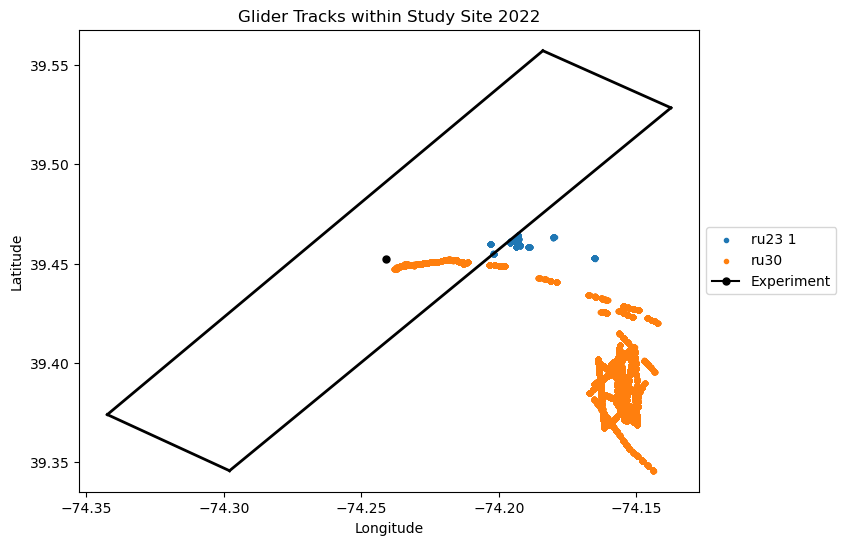

In [13]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2022_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2022')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [14]:
for url in urls2022:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2022 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2022 = data2023[(data2023['depth'] >= depth_min) & (data2023['depth'] <= depth_max)]
all_data_2022

time   latitude  longitude     depth  \
22796 2023-03-20 11:52:11.740000+00:00  39.446299 -74.210726  7.631332   
22797 2023-03-20 11:52:18.740000+00:00  39.446302 -74.210739  8.832075   
22800 2023-03-20 11:52:25.740000+00:00  39.446305 -74.210751  9.883960   
22814 2023-03-20 11:53:28.740000+00:00  39.446330 -74.210865  9.169473   
22815 2023-03-20 11:53:35.740000+00:00  39.446333 -74.210878  8.534370   
...                                ...        ...        ...       ...   
39788 2023-05-03 10:00:15.750000+00:00  39.442880 -74.212872  8.266439   
39791 2023-05-03 10:00:23.800000+00:00  39.442880 -74.212872  9.645801   
39803 2023-05-03 10:00:56.990000+00:00  39.442884 -74.212870  9.715264   
39805 2023-05-03 10:01:05.010000+00:00  39.442885 -74.212869  8.385521   
39808 2023-05-03 10:01:13.040000+00:00  39.442886 -74.212868  7.105387   

                      trajectory  conductivity     density  \
22796  maracoos_04-20230221T1724       3.07469  1024.38420   
22797  maracoos_04-20230221T1724       3.08665  1024.44270   
22800  maracoos_04-20230221T1724       3.10432  1024.53300   
22814  maracoos_04-20230221T1724       3.09878  1024.49660   
22815  maracoos_04-20230221T1724       3.08698  1024.43310   
...                          ...           ...         ...   
39788     unit_648-20230324T1507       3.50838  1023.01050   
39791     unit_648-20230324T1507       3.53586  1023.41656   
39803     unit_648-20230324T1507       3.53453  1023.42200   
39805     unit_648-20230324T1507       3.51031  1023.06494   
39808     unit_648-20230324T1507       3.49796  1022.84814   

       oxygen_concentration   salinity  temperature oxygen_saturation  
22796               296.780  30.940128       5.9951              None  
22797               296.764  31.016489       6.0564              None  
22800               296.519  31.137049       6.1384              None  
22814               294.520  31.092422       6.1204              None  
22815               294.634  31.008038       6.0698              None  
...                     ...        ...          ...               ...  
39788                   NaN  30.314623      11.9136              None  
39791                   NaN  30.774578      11.6749              None  
39803                   NaN  30.776949      11.6565              None  
39805                   NaN  30.372757      11.8649              None  
39808                   NaN  30.135109      12.0126              None  

[129 rows x 11 columns]

In [15]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2022.longitude,all_data_2022.latitude]).T)

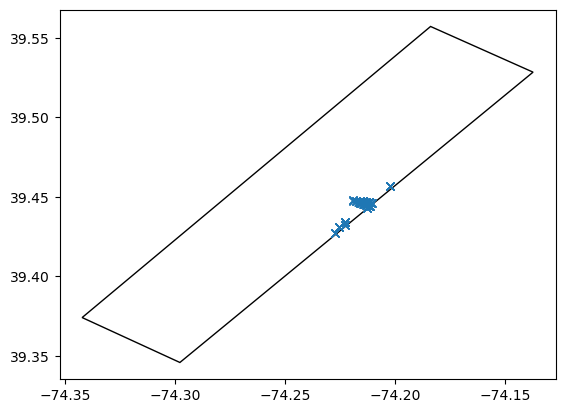

In [16]:
plt.plot(all_data_2022.longitude[mask],all_data_2022.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [17]:
data2022 = all_data_2022[mask]
data2022['time'] = pd.to_datetime(data2022['time'])
data2022

time   latitude  longitude     depth  \
22796 2023-03-20 11:52:11.740000+00:00  39.446299 -74.210726  7.631332   
22797 2023-03-20 11:52:18.740000+00:00  39.446302 -74.210739  8.832075   
22800 2023-03-20 11:52:25.740000+00:00  39.446305 -74.210751  9.883960   
22814 2023-03-20 11:53:28.740000+00:00  39.446330 -74.210865  9.169473   
22815 2023-03-20 11:53:35.740000+00:00  39.446333 -74.210878  8.534370   
...                                ...        ...        ...       ...   
39788 2023-05-03 10:00:15.750000+00:00  39.442880 -74.212872  8.266439   
39791 2023-05-03 10:00:23.800000+00:00  39.442880 -74.212872  9.645801   
39803 2023-05-03 10:00:56.990000+00:00  39.442884 -74.212870  9.715264   
39805 2023-05-03 10:01:05.010000+00:00  39.442885 -74.212869  8.385521   
39808 2023-05-03 10:01:13.040000+00:00  39.442886 -74.212868  7.105387   

                      trajectory  conductivity     density  \
22796  maracoos_04-20230221T1724       3.07469  1024.38420   
22797  maracoos_04-20230221T1724       3.08665  1024.44270   
22800  maracoos_04-20230221T1724       3.10432  1024.53300   
22814  maracoos_04-20230221T1724       3.09878  1024.49660   
22815  maracoos_04-20230221T1724       3.08698  1024.43310   
...                          ...           ...         ...   
39788     unit_648-20230324T1507       3.50838  1023.01050   
39791     unit_648-20230324T1507       3.53586  1023.41656   
39803     unit_648-20230324T1507       3.53453  1023.42200   
39805     unit_648-20230324T1507       3.51031  1023.06494   
39808     unit_648-20230324T1507       3.49796  1022.84814   

       oxygen_concentration   salinity  temperature oxygen_saturation  
22796               296.780  30.940128       5.9951              None  
22797               296.764  31.016489       6.0564              None  
22800               296.519  31.137049       6.1384              None  
22814               294.520  31.092422       6.1204              None  
22815               294.634  31.008038       6.0698              None  
...                     ...        ...          ...               ...  
39788                   NaN  30.314623      11.9136              None  
39791                   NaN  30.774578      11.6749              None  
39803                   NaN  30.776949      11.6565              None  
39805                   NaN  30.372757      11.8649              None  
39808                   NaN  30.135109      12.0126              None  

[129 rows x 11 columns]

In [18]:
gliders2022 = data2022.groupby(data2022['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2022

time   latitude  longitude     depth                 trajectory  \
0  2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
1  2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
2  2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      3.087268  1024.436914            295.789589  31.013325     6.067368   
1      3.522183  1023.160573                   NaN  30.494229    11.859333   
2      3.535199  1023.387628            255.863375  30.748636    11.700737   

  oxygen_saturation  
0               NaN  
1               NaN  
2               NaN

In [19]:
gliders2022['time'] = pd.to_datetime(gliders2022['time'])
gliders2022['julian_day'] = Time(gliders2022['time']).jd
gliders2022 = pd.DataFrame(gliders2022)
gliders2022['time'] = pd.to_datetime(gliders2022['time'])
gliders2022['day_of_year'] = gliders2022['time'].dt.dayofyear
gliders2022.drop(columns=['julian_day'], inplace=True)
gliders2022['oxygen_concentration_mg_per_l'] = gliders2022['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2022

time   latitude  longitude     depth                 trajectory  \
0 2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
1 2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
2 2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      3.087268  1024.436914            295.789589  31.013325     6.067368   
1      3.522183  1023.160573                   NaN  30.494229    11.859333   
2      3.535199  1023.387628            255.863375  30.748636    11.700737   

  oxygen_saturation  day_of_year  oxygen_concentration_mg_per_l  
0               NaN           79                       9.465267  
1               NaN          122                            NaN  
2               NaN          123                       8.187628

(0.0, 365.0)

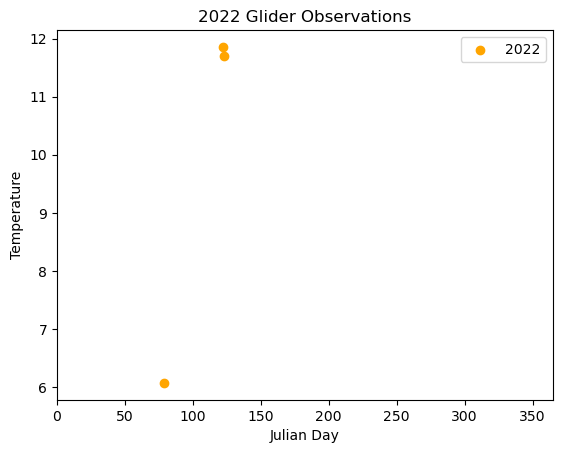

In [20]:
plt.scatter(gliders2022['day_of_year'], gliders2022['temperature'], color='orange', label='2022')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2022 Glider Observations')
plt.legend()
plt.xlim(0,365)

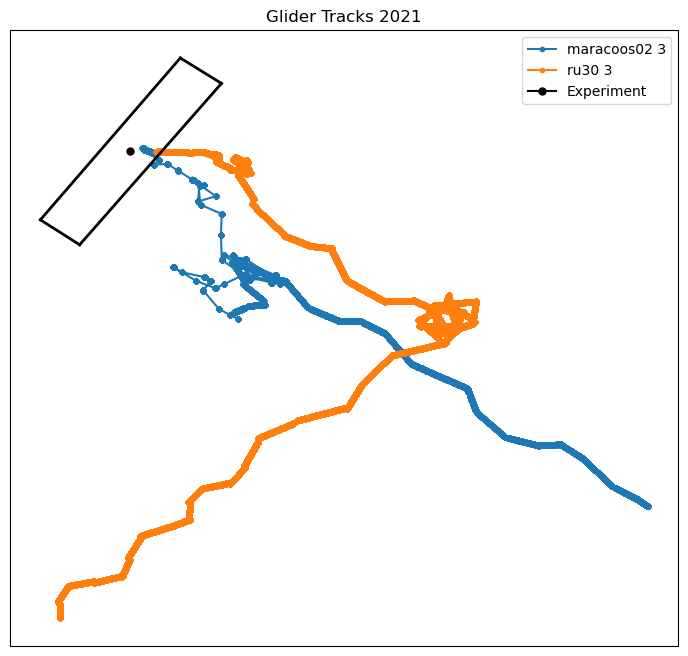

In [21]:
urls2021 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/maracoos_02-20210716T1814-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dvl_ensemble_offset%2Csci_dvl_error%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2021-08-06T00%3A00%3A00Z&time%3C=2021-08-13T16%3A11%3A50Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20210503T1929-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Csci_oxy4_timestamp%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Coxygen_saturation%2Coxygen_saturation_optimal_shift%2Coxygen_saturation_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csbe41n_ph_electrode_current%2Csbe41n_ph_electrode_voltage%2Csbe41n_ph_is_installed%2Csbe41n_ph_ref_voltage%2Csbe41n_ph_ref_voltage_optimal_shift%2Csbe41n_ph_ref_voltage_shifted%2Csbe41n_ph_substrate_current%2Csci_ctd41cp_is_installed%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy4_c1amp%2Csci_oxy4_c1rph%2Csci_oxy4_c2amp%2Csci_oxy4_c2rph%2Csci_oxy4_calphase%2Csci_oxy4_is_installed%2Csci_oxy4_rawtemp%2Csci_oxy4_tcphase%2Csci_sbe41n_ph_timestamp%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2021-05-20T00%3A00%3A00.00Z&time%3C=2021-05-27T14%3A30%3A46.26Z',
]

url2021_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/maracoos_02-20210716T1814-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_flbbcdslc%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dvl_ensemble_offset%2Csci_dvl_error%2Csci_m_present_time%2Csci_oxy4_calphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2021-08-06T00%3A00%3A00Z&time%3C=2021-08-13T16%3A11%3A50Z':'maracoos02 3',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20210503T1929-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Cconductivity_hysteresis_test%2Cconductivity_qartod_climatology_test%2Cconductivity_qartod_flat_line_test%2Cconductivity_qartod_gross_range_test%2Cconductivity_qartod_rate_of_change_test%2Cconductivity_qartod_spike_test%2Cconductivity_qartod_summary_flag%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity_qartod_climatology_test%2Cdensity_qartod_flat_line_test%2Cdensity_qartod_rate_of_change_test%2Cdensity_qartod_spike_test%2Cdensity_qartod_summary_flag%2Cdepth_interpolated%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Csci_oxy4_timestamp%2Coxygen_concentration%2Coxygen_concentration_optimal_shift%2Coxygen_concentration_shifted%2Coxygen_saturation%2Coxygen_saturation_optimal_shift%2Coxygen_saturation_shifted%2Cplatform%2Cpotential_temperature%2Cpressure%2Cpressure_qartod_flat_line_test%2Cpressure_qartod_gross_range_test%2Cpressure_qartod_pressure_test%2Cpressure_qartod_rate_of_change_test%2Cpressure_qartod_spike_test%2Cpressure_qartod_summary_flag%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity_qartod_climatology_test%2Csalinity_qartod_flat_line_test%2Csalinity_qartod_rate_of_change_test%2Csalinity_qartod_spike_test%2Csalinity_qartod_summary_flag%2Csbe41n_ph_electrode_current%2Csbe41n_ph_electrode_voltage%2Csbe41n_ph_is_installed%2Csbe41n_ph_ref_voltage%2Csbe41n_ph_ref_voltage_optimal_shift%2Csbe41n_ph_ref_voltage_shifted%2Csbe41n_ph_substrate_current%2Csci_ctd41cp_is_installed%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy4_c1amp%2Csci_oxy4_c1rph%2Csci_oxy4_c2amp%2Csci_oxy4_c2rph%2Csci_oxy4_calphase%2Csci_oxy4_is_installed%2Csci_oxy4_rawtemp%2Csci_oxy4_tcphase%2Csci_sbe41n_ph_timestamp%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Ctemperature_hysteresis_test%2Ctemperature_qartod_climatology_test%2Ctemperature_qartod_flat_line_test%2Ctemperature_qartod_gross_range_test%2Ctemperature_qartod_rate_of_change_test%2Ctemperature_qartod_spike_test%2Ctemperature_qartod_summary_flag%2Cu%2Cv%2Cwater_depth&time%3E=2021-05-20T00%3A00%3A00.00Z&time%3C=2021-05-27T14%3A30%3A46.26Z':'ru30 3',
} 

data_by_url = {}

for url in urls2021:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2021_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2021')

ax.legend()
plt.show()

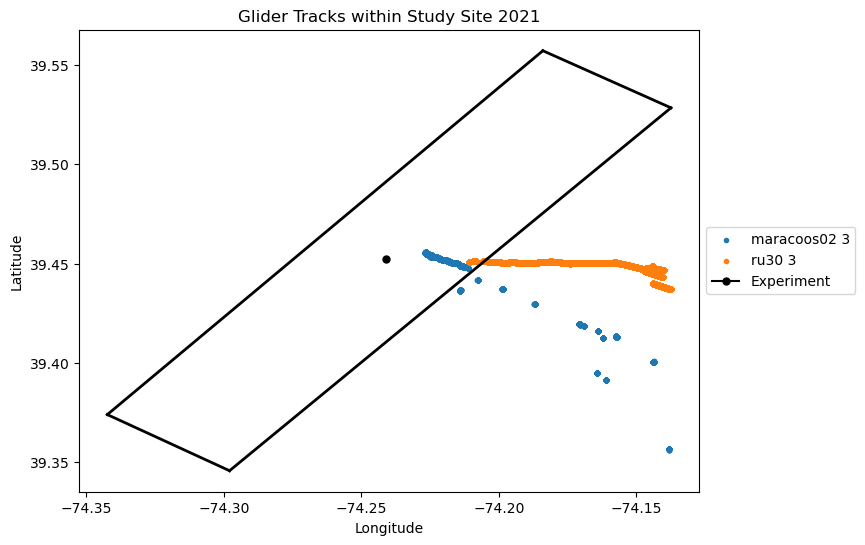

In [22]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2021_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2021')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [23]:
for url in urls2021:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2021 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2021 = data2021[(data2021['depth'] >= depth_min) & (data2021['depth'] <= depth_max)]
all_data_2021

time   latitude  longitude     depth  \
45            2021-08-06 00:10:36+00:00  39.050157 -73.655684  7.542291   
47            2021-08-06 00:10:43+00:00  39.050164 -73.655693  8.782772   
146           2021-08-06 00:17:01+00:00  39.050520 -73.656217  9.834695   
148           2021-08-06 00:17:08+00:00  39.050527 -73.656226  8.762924   
149           2021-08-06 00:17:15+00:00  39.050533 -73.656236  7.988864   
...                                 ...        ...        ...       ...   
737273 2021-05-27 14:26:06.050000+00:00  39.450885 -74.210754  7.929034   
737276 2021-05-27 14:26:08.120000+00:00  39.450886 -74.210759  7.184770   
737278 2021-05-27 14:26:10.190000+00:00  39.450887 -74.210764  7.819876   
737283 2021-05-27 14:26:14.310000+00:00  39.450890 -74.210775  7.035917   
737284 2021-05-27 14:26:15.380000+00:00  39.450891 -74.210777  7.254235   

                       trajectory  conductivity     density   salinity  \
45      maracoos_02-20210716T1814       4.72983  1021.42413  31.819592   
47      maracoos_02-20210716T1814       4.72830  1021.44250  31.826656   
146     maracoos_02-20210716T1814       4.73358  1021.44980  31.842676   
148     maracoos_02-20210716T1814       4.72922  1021.44710  31.833092   
149     maracoos_02-20210716T1814       4.72310  1021.43080  31.806038   
...                           ...           ...         ...        ...   
737273         ru30-20210503T1929       3.83395  1024.32540  32.329903   
737276         ru30-20210503T1929       3.85227  1024.25680  32.305070   
737278         ru30-20210503T1929       3.87621  1024.15520  32.254093   
737283         ru30-20210503T1929       3.89996  1024.07860  32.234920   
737284         ru30-20210503T1929       3.90776  1024.06080  32.233710   

        temperature oxygen_saturation oxygen_concentration  
45          23.4778              None                 None  
47          23.4514              None                 None  
146         23.4840              None                 None  
148         23.4521              None                 None  
149         23.4259              None                 None  
...             ...               ...                  ...  
737273      13.2042              None                 None  
737276      13.4359              None                 None  
737278      13.7598              None                 None  
737283      14.0444              None                 None  
737284      14.1315              None                 None  

[37330 rows x 11 columns]

In [24]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2021.longitude,all_data_2021.latitude]).T)

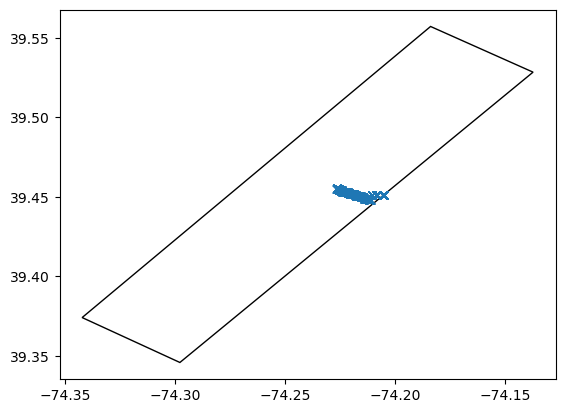

In [25]:
plt.plot(all_data_2021.longitude[mask],all_data_2021.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [26]:
data2021 = all_data_2021[mask]
data2021['time'] = pd.to_datetime(data2021['time'])
data2021

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\529991537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2021['time'] = pd.to_datetime(data2021['time'])


time   latitude  longitude     depth  \
29993         2021-08-13 13:33:28+00:00  39.447939 -74.211181  7.611484   
29995         2021-08-13 13:33:35+00:00  39.447946 -74.211201  9.119854   
30015         2021-08-13 13:34:31+00:00  39.447999 -74.211364  9.417557   
30016         2021-08-13 13:34:38+00:00  39.448006 -74.211384  8.792379   
30019         2021-08-13 13:34:45+00:00  39.448013 -74.211405  7.958807   
...                                 ...        ...        ...       ...   
737273 2021-05-27 14:26:06.050000+00:00  39.450885 -74.210754  7.929034   
737276 2021-05-27 14:26:08.120000+00:00  39.450886 -74.210759  7.184770   
737278 2021-05-27 14:26:10.190000+00:00  39.450887 -74.210764  7.819876   
737283 2021-05-27 14:26:14.310000+00:00  39.450890 -74.210775  7.035917   
737284 2021-05-27 14:26:15.380000+00:00  39.450891 -74.210777  7.254235   

                       trajectory  conductivity     density   salinity  \
29993   maracoos_02-20210716T1814       4.57120  1020.58856  30.683704   
29995   maracoos_02-20210716T1814       4.56342  1020.76930  30.812353   
30015   maracoos_02-20210716T1814       4.55674  1020.93930  30.940120   
30016   maracoos_02-20210716T1814       4.55945  1020.78094  30.813154   
30019   maracoos_02-20210716T1814       4.56705  1020.60720  30.687320   
...                           ...           ...         ...        ...   
737273         ru30-20210503T1929       3.83395  1024.32540  32.329903   
737276         ru30-20210503T1929       3.85227  1024.25680  32.305070   
737278         ru30-20210503T1929       3.87621  1024.15520  32.254093   
737283         ru30-20210503T1929       3.89996  1024.07860  32.234920   
737284         ru30-20210503T1929       3.90776  1024.06080  32.233710   

        temperature oxygen_saturation oxygen_concentration  
29993       23.3979              None                 None  
29995       23.1282              None                 None  
30015       22.8738              None                 None  
30016       23.0843              None                 None  
30019       23.3476              None                 None  
...             ...               ...                  ...  
737273      13.2042              None                 None  
737276      13.4359              None                 None  
737278      13.7598              None                 None  
737283      14.0444              None                 None  
737284      14.1315              None                 None  

[291 rows x 11 columns]

In [27]:
gliders2021 = data2021.groupby(data2021['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2021

time   latitude  longitude     depth                 trajectory  \
0  2021-05-27  39.451132 -74.208284  8.480827         ru30-20210503T1929   
1  2021-08-13  39.451881 -74.220008  8.498309  maracoos_02-20210716T1814   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      3.810367  1024.484240                  NaN  32.436555     12.81837   
1      4.558984  1020.771542                  NaN  30.805470     23.09132   

  oxygen_saturation  
0               NaN  
1               NaN

In [28]:
gliders2021['time'] = pd.to_datetime(gliders2021['time'])
gliders2021['julian_day'] = Time(gliders2021['time']).jd
gliders2021 = pd.DataFrame(gliders2021)
gliders2021['time'] = pd.to_datetime(gliders2021['time'])
gliders2021['day_of_year'] = gliders2021['time'].dt.dayofyear
gliders2021.drop(columns=['julian_day'], inplace=True)
gliders2021['oxygen_concentration_mg_per_l'] = gliders2021['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2021

time   latitude  longitude     depth                 trajectory  \
0 2021-05-27  39.451132 -74.208284  8.480827         ru30-20210503T1929   
1 2021-08-13  39.451881 -74.220008  8.498309  maracoos_02-20210716T1814   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      3.810367  1024.484240                  NaN  32.436555     12.81837   
1      4.558984  1020.771542                  NaN  30.805470     23.09132   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          147                           NaN  
1               NaN          225                           NaN

(0.0, 365.0)

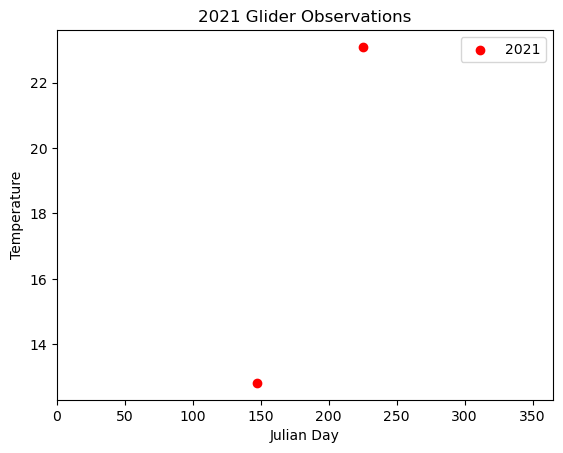

In [29]:
plt.scatter(gliders2021['day_of_year'], gliders2021['temperature'], color='red', label='2021')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2021 Glider Observations')
plt.legend()
plt.xlim(0,365)

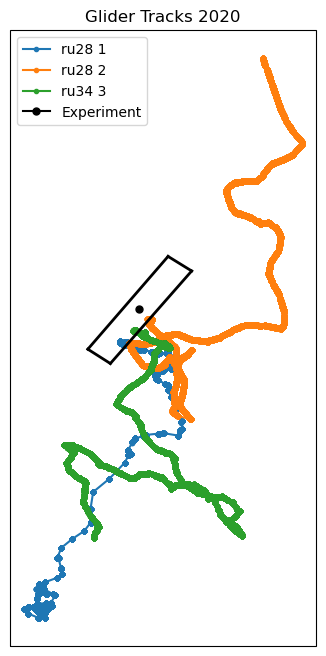

In [30]:
urls2020 = [
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru33-20201203T1521-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity2%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_ctd_rbr%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dvl_ensemble_offset%2Csci_m_present_time%2Csci_water_pressure%2Csci_water_pressure2%2Csound_speed%2Ctemperature%2Ctemperature2%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T13%3A50%3A27Z',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T15%3A51%3A16Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20201028T1927-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_lisst_meansize%2Csci_lisst_raw_lref%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-12T00%3A00%3A00Z&time%3C=2020-11-19T13%3A57%3A27Z',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru33-20201014T1746-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity2%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity2%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_ctd_rbr%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpotential_temperature2%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity2%2Csci_m_present_time%2Csci_water_pressure%2Csci_water_pressure2%2Csound_speed%2Csound_speed2%2Ctemperature%2Ctemperature2%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-12T00%3A00%3A00Z&time%3C=2020-11-19T14%3A05%3A37Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20201009T1155-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_lisst_meansize%2Csci_lisst_raw_lref%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-14T00%3A00%3A00Z&time%3C=2020-10-21T15%3A57%3A15Z',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201003T1821-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-29T00%3A00%3A00Z&time%3C=2020-11-05T16%3A39%3A00Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20200729T1430-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-08-19T00%3A00%3A00Z&time%3C=2020-08-26T14%3A59%3A24Z',
]

url2020_labels = {
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru33-20201203T1521-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity2%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_ctd_rbr%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dvl_ensemble_offset%2Csci_m_present_time%2Csci_water_pressure%2Csci_water_pressure2%2Csound_speed%2Ctemperature%2Ctemperature2%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T13%3A50%3A27Z':'ru33 1',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201119T1533-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-12-14T00%3A00%3A00Z&time%3C=2020-12-21T15%3A51%3A16Z':'ru34 1',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20201028T1927-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_lisst_meansize%2Csci_lisst_raw_lref%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-12T00%3A00%3A00Z&time%3C=2020-11-19T13%3A57%3A27Z':'ru28 1',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru33-20201014T1746-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Cconductivity2%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cdensity2%2Cinstrument_adcp%2Cinstrument_ctd%2Cinstrument_ctd_rbr%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpotential_temperature2%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csalinity2%2Csci_m_present_time%2Csci_water_pressure%2Csci_water_pressure2%2Csound_speed%2Csound_speed2%2Ctemperature%2Ctemperature2%2Cu%2Cv%2Cwater_depth&time%3E=2020-11-12T00%3A00%3A00Z&time%3C=2020-11-19T14%3A05%3A37Z':'ru33 2',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20201009T1155-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_lisst_meansize%2Csci_lisst_raw_lref%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-14T00%3A00%3A00Z&time%3C=2020-10-21T15%3A57%3A15Z':'ru28 2',
    # 'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20201003T1821-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_dmon_is_installed%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-10-29T00%3A00%3A00Z&time%3C=2020-11-05T16%3A39%3A00Z':'ru34 2',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru34-20200729T1430-profile-sci-rt.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_ctd%2Cinstrument_dmon%2Cinstrument_optode%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_dmon_msg_byte_count%2Csci_m_present_time%2Csci_oxy3835_wphase_dphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2020-08-19T00%3A00%3A00Z&time%3C=2020-08-26T14%3A59%3A24Z':'ru34 3',
} 

data_by_url = {}

for url in urls2020:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2020_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2020')

ax.legend()
plt.show()

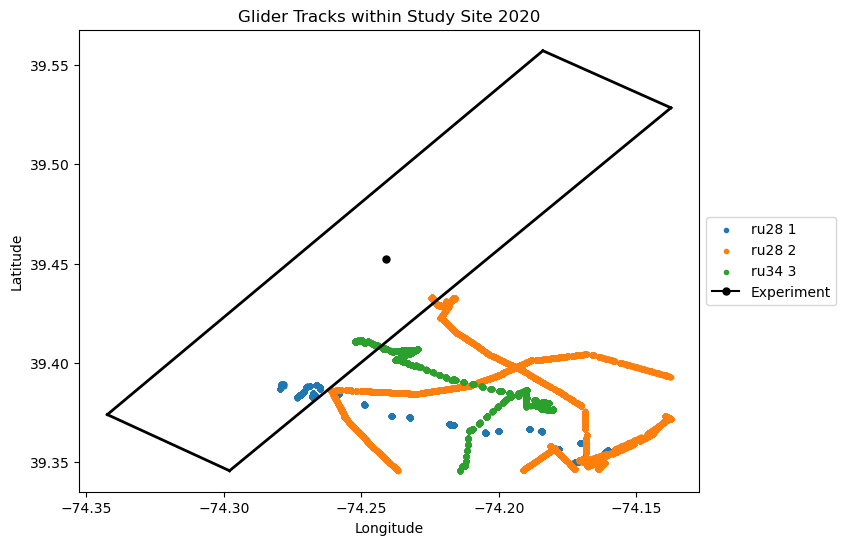

In [31]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2020_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2020')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [32]:
for url in urls2020:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2020 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2020 = data2020[(data2020['depth'] >= depth_min) & (data2020['depth'] <= depth_max)]
all_data_2020

time   latitude  longitude     depth  \
36     2020-11-12 00:03:57+00:00  38.910152 -74.438495  7.462994   
38     2020-11-12 00:04:02+00:00  38.910143 -74.438482  8.048510   
40     2020-11-12 00:04:07+00:00  38.910135 -74.438470  8.534784   
42     2020-11-12 00:04:12+00:00  38.910126 -74.438457  9.239385   
44     2020-11-12 00:04:17+00:00  38.910118 -74.438444  9.646265   
...                          ...        ...        ...       ...   
136714 2020-08-26 14:56:54+00:00  39.410652 -74.252152  9.983226   
136739 2020-08-26 14:57:39+00:00  39.410725 -74.252242  9.308431   
136741 2020-08-26 14:57:44+00:00  39.410733 -74.252252  8.742792   
136743 2020-08-26 14:57:49+00:00  39.410741 -74.252262  8.147381   
136746 2020-08-26 14:57:54+00:00  39.410749 -74.252272  7.690898   

                trajectory  conductivity     density   salinity  temperature  \
36      ru28-20201028T1927       4.15083  1023.16614  31.934750      17.1533   
38      ru28-20201028T1927       4.14916  1023.17676  31.938240      17.1305   
40      ru28-20201028T1927       4.14844  1023.17900  31.936552      17.1246   
42      ru28-20201028T1927       4.14732  1023.18195  31.933641      17.1158   
44      ru28-20201028T1927       4.14578  1023.18933  31.935144      17.0970   
...                    ...           ...         ...        ...          ...   
136714  ru34-20200729T1430       4.59469  1021.34630  31.390106      22.6469   
136739  ru34-20200729T1430       4.58619  1021.46150  31.471090      22.4440   
136741  ru34-20200729T1430       4.59104  1021.41930  31.449108      22.5264   
136743  ru34-20200729T1430       4.60705  1021.30250  31.391436      22.7775   
136746  ru34-20200729T1430       4.62342  1021.18744  31.336224      23.0294   

       oxygen_saturation oxygen_concentration  
36                  None                 None  
38                  None                 None  
40                  None                 None  
42                  None                 None  
44                  None                 None  
...                  ...                  ...  
136714              None                 None  
136739              None                 None  
136741              None                 None  
136743              None                 None  
136746              None                 None  

[10731 rows x 11 columns]

In [33]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2020.longitude,all_data_2020.latitude]).T)

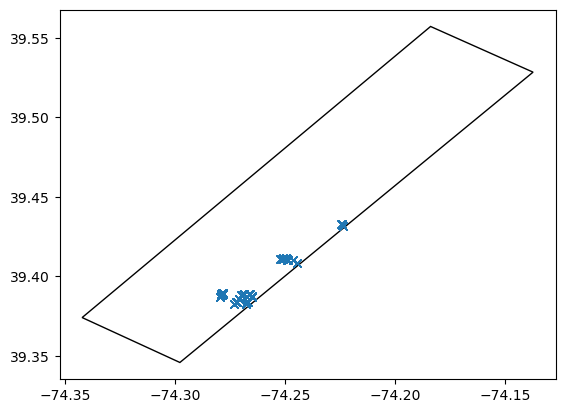

In [34]:
plt.plot(all_data_2020.longitude[mask],all_data_2020.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [35]:
data2020 = all_data_2020[mask]
data2020['time'] = pd.to_datetime(data2020['time'])
data2020

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\3227495291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2020['time'] = pd.to_datetime(data2020['time'])


time   latitude  longitude     depth  \
13438  2020-11-19 01:21:31+00:00  39.384081 -74.267004  7.204661   
13440  2020-11-19 01:21:35+00:00  39.384081 -74.267012  7.829847   
13443  2020-11-19 01:21:39+00:00  39.384081 -74.267020  8.326025   
13445  2020-11-19 01:21:43+00:00  39.384081 -74.267028  8.911513   
13447  2020-11-19 01:21:47+00:00  39.384081 -74.267036  9.457306   
...                          ...        ...        ...       ...   
136714 2020-08-26 14:56:54+00:00  39.410652 -74.252152  9.983226   
136739 2020-08-26 14:57:39+00:00  39.410725 -74.252242  9.308431   
136741 2020-08-26 14:57:44+00:00  39.410733 -74.252252  8.742792   
136743 2020-08-26 14:57:49+00:00  39.410741 -74.252262  8.147381   
136746 2020-08-26 14:57:54+00:00  39.410749 -74.252272  7.690898   

                trajectory  conductivity     density   salinity  temperature  \
13438   ru28-20201028T1927       3.73613  1023.32690  31.130566      13.5491   
13440   ru28-20201028T1927       3.73596  1023.32794  31.128344      13.5496   
13443   ru28-20201028T1927       3.73887  1023.33154  31.136139      13.5729   
13445   ru28-20201028T1927       3.73931  1023.33154  31.134450      13.5797   
13447   ru28-20201028T1927       3.73949  1023.33466  31.135420      13.5803   
...                    ...           ...         ...        ...          ...   
136714  ru34-20200729T1430       4.59469  1021.34630  31.390106      22.6469   
136739  ru34-20200729T1430       4.58619  1021.46150  31.471090      22.4440   
136741  ru34-20200729T1430       4.59104  1021.41930  31.449108      22.5264   
136743  ru34-20200729T1430       4.60705  1021.30250  31.391436      22.7775   
136746  ru34-20200729T1430       4.62342  1021.18744  31.336224      23.0294   

       oxygen_saturation oxygen_concentration  
13438               None                 None  
13440               None                 None  
13443               None                 None  
13445               None                 None  
13447               None                 None  
...                  ...                  ...  
136714              None                 None  
136739              None                 None  
136741              None                 None  
136743              None                 None  
136746              None                 None  

[358 rows x 11 columns]

In [36]:
gliders2020 = data2020.groupby(data2020['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2020

time   latitude  longitude     depth          trajectory  \
0  2020-08-26  39.410457 -74.248894  8.402403  ru34-20200729T1430   
1  2020-10-21  39.432330 -74.224116  8.416465  ru28-20201009T1155   
2  2020-11-19  39.387057 -74.273672  8.523160  ru28-20201028T1927   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.617372  1021.204783                  NaN  31.333148    22.969531   
1      4.202499  1022.636038                  NaN  31.560648    18.194079   
2      3.740526  1023.395274                  NaN  31.201660    13.511148   

  oxygen_saturation  
0               NaN  
1               NaN  
2               NaN

In [37]:
gliders2020['time'] = pd.to_datetime(gliders2020['time'])
gliders2020['julian_day'] = Time(gliders2020['time']).jd
gliders2020 = pd.DataFrame(gliders2020)
gliders2020['time'] = pd.to_datetime(gliders2020['time'])
gliders2020['day_of_year'] = gliders2020['time'].dt.dayofyear
gliders2020.drop(columns=['julian_day'], inplace=True)
gliders2020['oxygen_concentration_mg_per_l'] = gliders2020['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2020

time   latitude  longitude     depth          trajectory  \
0 2020-08-26  39.410457 -74.248894  8.402403  ru34-20200729T1430   
1 2020-10-21  39.432330 -74.224116  8.416465  ru28-20201009T1155   
2 2020-11-19  39.387057 -74.273672  8.523160  ru28-20201028T1927   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.617372  1021.204783                  NaN  31.333148    22.969531   
1      4.202499  1022.636038                  NaN  31.560648    18.194079   
2      3.740526  1023.395274                  NaN  31.201660    13.511148   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          239                           NaN  
1               NaN          295                           NaN  
2               NaN          324                           NaN

(0.0, 365.0)

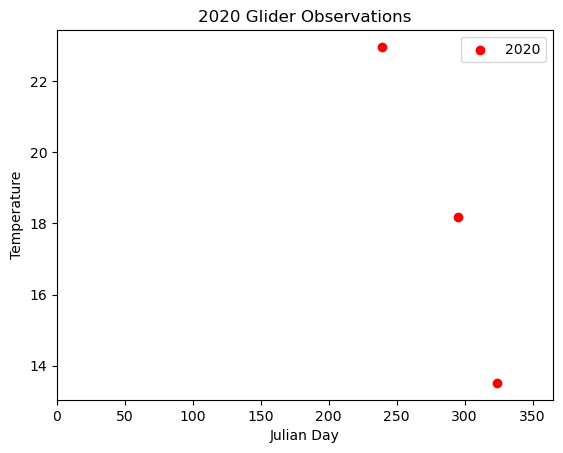

In [38]:
plt.scatter(gliders2020['day_of_year'], gliders2020['temperature'], color='red', label='2020')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2020 Glider Observations')
plt.legend()
plt.xlim(0,365)

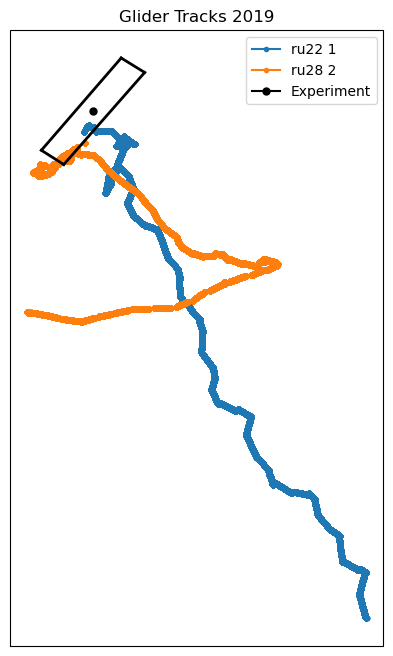

In [39]:
urls2019 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru22-20191014T1645-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_880nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_bbfl2slo%2Cinstrument_c3_fluorometer%2Cinstrument_ctd%2Cm_pitch%2Cm_roll%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_c3sfl_cdom%2Csci_c3sfl_chlorophyll%2Csci_c3sfl_turbidity%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2019-11-02T00%3A00%3A00Z&time%3C=2019-11-09T15%3A28%3A55Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20190926T1413-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Clisst_timestamp%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2019-10-17T00%3A00%3A00Z&time%3C=2019-10-24T13%3A12%3A24Z',
]

url2019_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru22-20191014T1645-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_880nm%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cinstrument_bbfl2slo%2Cinstrument_c3_fluorometer%2Cinstrument_ctd%2Cm_pitch%2Cm_roll%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_c3sfl_cdom%2Csci_c3sfl_chlorophyll%2Csci_c3sfl_turbidity%2Csci_m_present_time%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2019-11-02T00%3A00%3A00Z&time%3C=2019-11-09T15%3A28%3A55Z':'ru22 1',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20190926T1413-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Clisst_timestamp%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2019-10-17T00%3A00%3A00Z&time%3C=2019-10-24T13%3A12%3A24Z':'ru28 2',
} 

data_by_url = {}

for url in urls2019:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2019_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2019')

ax.legend()
plt.show()

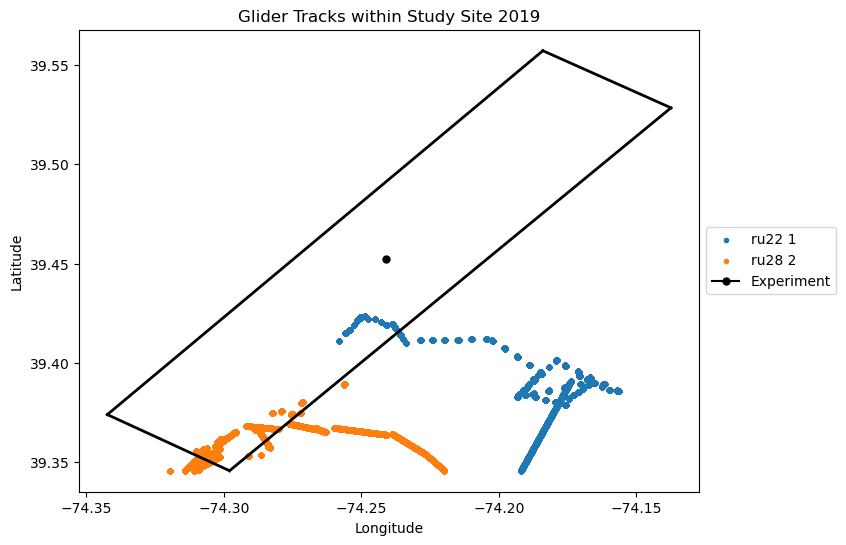

In [40]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2019_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2019')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))


In [41]:
for url in urls2019:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2019 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2019 = data2019[(data2019['depth'] >= depth_min) & (data2019['depth'] <= depth_max)]
all_data_2019

time   latitude  longitude     depth  \
131    2019-11-02 00:03:06+00:00  38.446339 -73.697738  9.745911   
133    2019-11-02 00:03:08+00:00  38.446343 -73.697744  9.388636   
134    2019-11-02 00:03:10+00:00  38.446347 -73.697749  9.001586   
136    2019-11-02 00:03:12+00:00  38.446351 -73.697755  8.654233   
137    2019-11-02 00:03:14+00:00  38.446355 -73.697760  8.326729   
...                          ...        ...        ...       ...   
716271 2019-10-24 13:11:27+00:00  39.346489 -74.345454  8.008498   
716273 2019-10-24 13:11:29+00:00  39.346491 -74.345453  7.681019   
716274 2019-10-24 13:11:31+00:00  39.346494 -74.345452  7.432929   
716276 2019-10-24 13:11:33+00:00  39.346496 -74.345451  7.284074   
716277 2019-10-24 13:11:35+00:00  39.346498 -74.345450  7.105449   

                trajectory  conductivity     density   salinity  temperature  \
131     ru22-20191014T1645       4.58706  1025.02890  34.717117      18.2998   
133     ru22-20191014T1645       4.58732  1025.02700  34.717422      18.3022   
134     ru22-20191014T1645       4.58770  1025.02440  34.717487      18.3061   
136     ru22-20191014T1645       4.58806  1025.02170  34.717285      18.3101   
137     ru22-20191014T1645       4.58860  1025.01970  34.718006      18.3148   
...                    ...           ...         ...        ...          ...   
716271  ru28-20190926T1413       4.02167  1022.80610  31.284126      16.5635   
716273  ru28-20190926T1413       4.01877  1022.80170  31.274494      16.5438   
716274  ru28-20190926T1413       4.01677  1022.79650  31.265911      16.5327   
716276  ru28-20190926T1413       4.01527  1022.79450  31.261078      16.5223   
716277  ru28-20190926T1413       4.01368  1022.78986  31.253675      16.5142   

       oxygen_saturation oxygen_concentration  
131                 None                 None  
133                 None                 None  
134                 None                 None  
136                 None                 None  
137                 None                 None  
...                  ...                  ...  
716271              None                 None  
716273              None                 None  
716274              None                 None  
716276              None                 None  
716277              None                 None  

[50819 rows x 11 columns]

In [42]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2019.longitude,all_data_2019.latitude]).T)

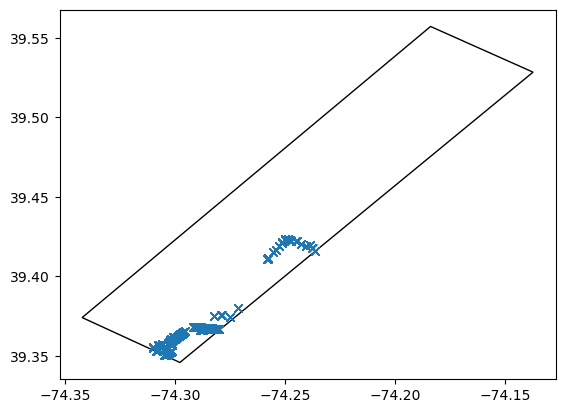

In [43]:
plt.plot(all_data_2019.longitude[mask],all_data_2019.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [44]:
data2019 = all_data_2019[mask]
data2019['time'] = pd.to_datetime(data2019['time'])
data2019

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\1257741327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2019['time'] = pd.to_datetime(data2019['time'])


time   latitude  longitude     depth  \
379642 2019-11-09 05:02:17+00:00  39.415789 -74.236665  7.016092   
379645 2019-11-09 05:02:19+00:00  39.415790 -74.236666  7.284028   
379647 2019-11-09 05:02:21+00:00  39.415792 -74.236667  7.561888   
379650 2019-11-09 05:02:23+00:00  39.415794 -74.236668  7.889365   
379651 2019-11-09 05:02:25+00:00  39.415796 -74.236669  8.276383   
...                          ...        ...        ...       ...   
664930 2019-10-23 19:49:23+00:00  39.350262 -74.304947  8.861922   
664932 2019-10-23 19:49:25+00:00  39.350259 -74.304951  9.239017   
664935 2019-10-23 19:49:27+00:00  39.350256 -74.304955  9.467258   
664937 2019-10-23 19:49:29+00:00  39.350253 -74.304959  9.645882   
664939 2019-10-23 19:49:31+00:00  39.350250 -74.304963  9.953510   

                trajectory  conductivity     density   salinity  temperature  \
379642  ru22-20191014T1645       3.82406  1023.20330  31.208336      14.4493   
379645  ru22-20191014T1645       3.82458  1023.20340  31.208448      14.4549   
379647  ru22-20191014T1645       3.82474  1023.20340  31.207542      14.4577   
379650  ru22-20191014T1645       3.82476  1023.20544  31.208084      14.4571   
379651  ru22-20191014T1645       3.82496  1023.20650  31.207823      14.4595   
...                    ...           ...         ...        ...          ...   
664930  ru28-20190926T1413       4.07506  1022.91046  31.506523      16.8687   
664932  ru28-20190926T1413       4.07479  1022.90607  31.500145      16.8737   
664935  ru28-20190926T1413       4.07469  1022.90454  31.497478      16.8759   
664937  ru28-20190926T1413       4.07517  1022.91070  31.503666      16.8732   
664939  ru28-20190926T1413       4.07517  1022.91626  31.507553      16.8681   

       oxygen_saturation oxygen_concentration  
379642              None                 None  
379645              None                 None  
379647              None                 None  
379650              None                 None  
379651              None                 None  
...                  ...                  ...  
664930              None                 None  
664932              None                 None  
664935              None                 None  
664937              None                 None  
664939              None                 None  

[2339 rows x 11 columns]

In [45]:
gliders2019 = data2019.groupby(data2019['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2019

time   latitude  longitude     depth          trajectory  \
0  2019-10-21  39.363794 -74.293567  8.491461  ru28-20190926T1413   
1  2019-10-22  39.363068 -74.296118  8.479733  ru28-20190926T1413   
2  2019-10-23  39.356793 -74.298596  8.520756  ru28-20190926T1413   
3  2019-11-09  39.419875 -74.247896  8.479408  ru22-20191014T1645   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.054043  1022.952152                  NaN  31.497328    16.649146   
1      4.062151  1022.911556                  NaN  31.478373    16.762568   
2      4.073235  1022.898596                  NaN  31.492470    16.866706   
3      3.775359  1023.132316                  NaN  31.022148    14.128233   

  oxygen_saturation  
0               NaN  
1               NaN  
2               NaN  
3               NaN

In [46]:
gliders2019['time'] = pd.to_datetime(gliders2019['time'])
gliders2019['julian_day'] = Time(gliders2019['time']).jd
gliders2019 = pd.DataFrame(gliders2019)
gliders2019['time'] = pd.to_datetime(gliders2019['time'])
gliders2019['day_of_year'] = gliders2019['time'].dt.dayofyear
gliders2019.drop(columns=['julian_day'], inplace=True)
gliders2019['oxygen_concentration_mg_per_l'] = gliders2019['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2019

time   latitude  longitude     depth          trajectory  \
0 2019-10-21  39.363794 -74.293567  8.491461  ru28-20190926T1413   
1 2019-10-22  39.363068 -74.296118  8.479733  ru28-20190926T1413   
2 2019-10-23  39.356793 -74.298596  8.520756  ru28-20190926T1413   
3 2019-11-09  39.419875 -74.247896  8.479408  ru22-20191014T1645   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.054043  1022.952152                  NaN  31.497328    16.649146   
1      4.062151  1022.911556                  NaN  31.478373    16.762568   
2      4.073235  1022.898596                  NaN  31.492470    16.866706   
3      3.775359  1023.132316                  NaN  31.022148    14.128233   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          294                           NaN  
1               NaN          295                           NaN  
2               NaN          296                           NaN  
3               NaN          313                           NaN

(0.0, 365.0)

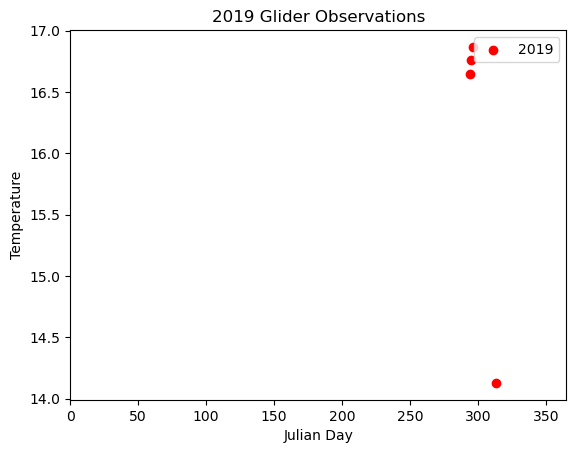

In [47]:
plt.scatter(gliders2019['day_of_year'], gliders2019['temperature'], color='red', label='2019')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2019 Glider Observations')
plt.legend()
plt.xlim(0,365)

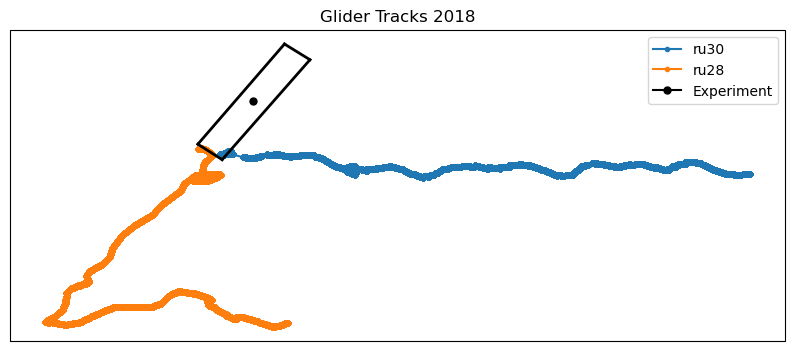

In [48]:
urls2018 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20180705T1825-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Csci_oxy4_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cph_electrode_current%2Cph_electrode_voltage%2Cph_ref_voltage%2Cph_substrate_current%2Cph_timestamp%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy4_c1amp%2Csci_oxy4_c1rph%2Csci_oxy4_c2amp%2Csci_oxy4_c2rph%2Csci_oxy4_calphase%2Csci_oxy4_is_installed%2Csci_oxy4_rawtemp%2Csci_oxy4_tcphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2018-08-21T00%3A00%3A00Z&time%3C=2018-08-28T16%3A53%3A08Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20181023T1320-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbackscatter_coefficient%2Cbeam_c%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cdensity%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_ctd41cp_timestamp%2Csci_flbbcd_bb_ref%2Csci_flbbcd_bb_sig%2Csci_flbbcd_cdom_ref%2Csci_flbbcd_cdom_sig%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_flbbcd_timestamp%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_timestamp%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_oxygen%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_oxy3835_wphase_saturation%2Csci_oxy3835_wphase_temp%2Csci_oxy3835_wphase_timestamp%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature&time%3E=2018-11-07T00%3A00%3A00Z&time%3C=2018-11-14T13%3A14%3A31Z',    
]

url2018_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20181023T1320-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbackscatter_coefficient%2Cbeam_c%2Ccdom%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cdensity%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Cinstrument_vmt%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_ctd41cp_is_installed%2Csci_ctd41cp_timestamp%2Csci_flbbcd_bb_ref%2Csci_flbbcd_bb_sig%2Csci_flbbcd_cdom_ref%2Csci_flbbcd_cdom_sig%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_flbbcd_timestamp%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_timestamp%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_oxygen%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_oxy3835_wphase_saturation%2Csci_oxy3835_wphase_temp%2Csci_oxy3835_wphase_timestamp%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature&time%3E=2018-11-07T00%3A00%3A00Z&time%3C=2018-11-14T13%3A14%3A31Z':'ru28',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru30-20180705T1825-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cinstrument_ph%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Csci_oxy4_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cph_electrode_current%2Cph_electrode_voltage%2Cph_ref_voltage%2Cph_substrate_current%2Cph_timestamp%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy4_c1amp%2Csci_oxy4_c1rph%2Csci_oxy4_c2amp%2Csci_oxy4_c2rph%2Csci_oxy4_calphase%2Csci_oxy4_is_installed%2Csci_oxy4_rawtemp%2Csci_oxy4_tcphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2018-08-21T00%3A00%3A00Z&time%3C=2018-08-28T16%3A53%3A08Z':'ru30',
}

data_by_url = {}

for url in urls2018:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2018_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2018')

ax.legend()
plt.show()

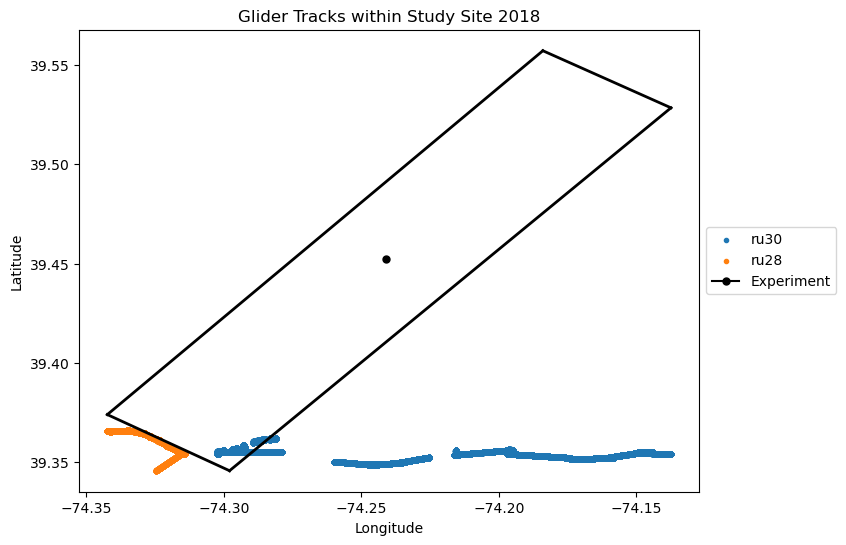

In [49]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2018_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2018')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))


In [50]:
for url in urls2018:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2018 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2018 = data2018[(data2018['depth'] >= depth_min) & (data2018['depth'] <= depth_max)]
all_data_2018

time   latitude  longitude     depth  \
298     2018-08-21 00:04:10+00:00  39.320043 -73.334384  9.993232   
301     2018-08-21 00:04:12+00:00  39.320043 -73.334391  9.407742   
302     2018-08-21 00:04:13+00:00  39.320042 -73.334394  8.881794   
305     2018-08-21 00:04:15+00:00  39.320042 -73.334401  8.603933   
307     2018-08-21 00:04:17+00:00  39.320042 -73.334407  8.326073   
...                           ...        ...        ...       ...   
1023282 2018-11-14 12:52:05+00:00  39.365434 -74.341253  7.124540   
1023283 2018-11-14 12:52:09+00:00  39.365436 -74.341263  7.236667   
1023284 2018-11-14 12:52:09+00:00  39.365436 -74.341263  7.236667   
1023310 2018-11-14 12:53:53+00:00  39.365485 -74.341506  7.182841   
1023311 2018-11-14 12:53:53+00:00  39.365485 -74.341506  7.182841   

                    trajectory  conductivity     density   salinity  \
298         ru30-20180705T1825       4.13395  1024.56750  33.225006   
301         ru30-20180705T1825       4.37263  1024.07850  33.314667   
302         ru30-20180705T1825       4.57440  1022.91394  32.734097   
305         ru30-20180705T1825       4.65706  1021.14690  31.385815   
307         ru30-20180705T1825       4.68712  1020.36865  30.802536   
...                        ...           ...         ...        ...   
1023282  ru28-20181023T1320-rt           NaN         NaN        NaN   
1023283  ru28-20181023T1320-rt           NaN         NaN        NaN   
1023284  ru28-20181023T1320-rt           NaN         NaN        NaN   
1023310  ru28-20181023T1320-rt           NaN         NaN        NaN   
1023311  ru28-20181023T1320-rt           NaN         NaN        NaN   

         temperature oxygen_saturation oxygen_concentration  
298          15.3937              None                 None  
301          17.7949              None                 None  
302          20.6256              None                 None  
305          23.3170              None                 None  
307          24.4744              None                 None  
...              ...               ...                  ...  
1023282          NaN              None                 None  
1023283          NaN              None                 None  
1023284          NaN              None                 None  
1023310          NaN              None                 None  
1023311          NaN              None                 None  

[83929 rows x 11 columns]

In [51]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2018.longitude,all_data_2018.latitude]).T)

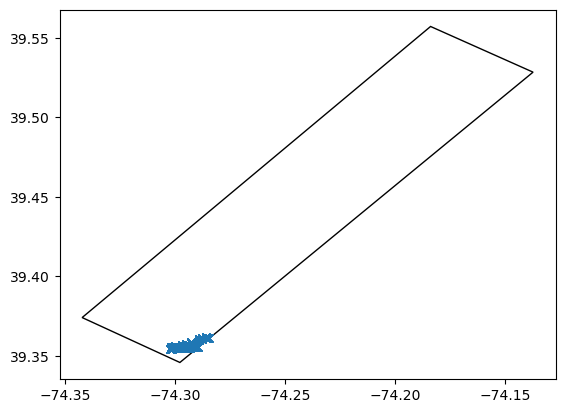

In [52]:
plt.plot(all_data_2018.longitude[mask],all_data_2018.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [53]:
data2018 = all_data_2018[mask]
data2018['time'] = pd.to_datetime(data2018['time'])
data2018

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\198337093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2018['time'] = pd.to_datetime(data2018['time'])


time   latitude  longitude     depth  \
671873 2018-08-28 10:24:23+00:00  39.355186 -74.289834  7.244374   
671878 2018-08-28 10:24:27+00:00  39.355186 -74.289848  8.236734   
671880 2018-08-28 10:24:29+00:00  39.355186 -74.289855  8.167269   
671883 2018-08-28 10:24:31+00:00  39.355186 -74.289862  8.633677   
671885 2018-08-28 10:24:33+00:00  39.355186 -74.289869  9.546642   
...                          ...        ...        ...       ...   
685422 2018-08-28 16:02:06+00:00  39.361071 -74.285336  9.060385   
685425 2018-08-28 16:02:10+00:00  39.361071 -74.285340  8.276424   
685428 2018-08-28 16:02:14+00:00  39.361070 -74.285344  7.671085   
685433 2018-08-28 16:02:18+00:00  39.361069 -74.285347  7.800092   
685435 2018-08-28 16:02:20+00:00  39.361068 -74.285349  7.293988   

                trajectory  conductivity     density   salinity  temperature  \
671873  ru30-20180705T1825       4.71417  1020.15770  30.701675      24.9131   
671878  ru30-20180705T1825       4.70069  1020.18720  30.686466      24.7903   
671880  ru30-20180705T1825       4.69389  1020.20430  30.682888      24.7225   
671883  ru30-20180705T1825       4.68804  1020.22340  30.681458      24.6615   
671885  ru30-20180705T1825       4.68290  1020.24480  30.682293      24.6046   
...                    ...           ...         ...        ...          ...   
685422  ru30-20180705T1825       4.58021  1021.30540  31.320414      22.5901   
685425  ru30-20180705T1825       4.62654  1020.75995  30.974285      23.5761   
685428  ru30-20180705T1825       4.63835  1020.45013  30.743914      24.0358   
685433  ru30-20180705T1825       4.64720  1020.35980  30.690504      24.2089   
685435  ru30-20180705T1825       4.65165  1020.33440  30.682817      24.2683   

       oxygen_saturation oxygen_concentration  
671873              None                 None  
671878              None                 None  
671880              None                 None  
671883              None                 None  
671885              None                 None  
...                  ...                  ...  
685422              None                 None  
685425              None                 None  
685428              None                 None  
685433              None                 None  
685435              None                 None  

[1065 rows x 11 columns]

In [54]:
gliders2018 = data2018.groupby(data2018['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2018

time   latitude  longitude     depth          trajectory  \
0  2018-08-28  39.356281 -74.295757  8.423295  ru30-20180705T1825   

   conductivity     density oxygen_concentration   salinity  temperature  \
0      4.652088  1020.40733                  NaN  30.742258    24.186789   

  oxygen_saturation  
0               NaN

In [55]:
gliders2018['time'] = pd.to_datetime(gliders2018['time'])
gliders2018['julian_day'] = Time(gliders2018['time']).jd
gliders2018 = pd.DataFrame(gliders2018)
gliders2018['time'] = pd.to_datetime(gliders2018['time'])
gliders2018['day_of_year'] = gliders2018['time'].dt.dayofyear
gliders2018.drop(columns=['julian_day'], inplace=True)
gliders2018['oxygen_concentration_mg_per_l'] = gliders2018['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2018

time   latitude  longitude     depth          trajectory  \
0 2018-08-28  39.356281 -74.295757  8.423295  ru30-20180705T1825   

   conductivity     density oxygen_concentration   salinity  temperature  \
0      4.652088  1020.40733                  NaN  30.742258    24.186789   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          240                           NaN

(0.0, 365.0)

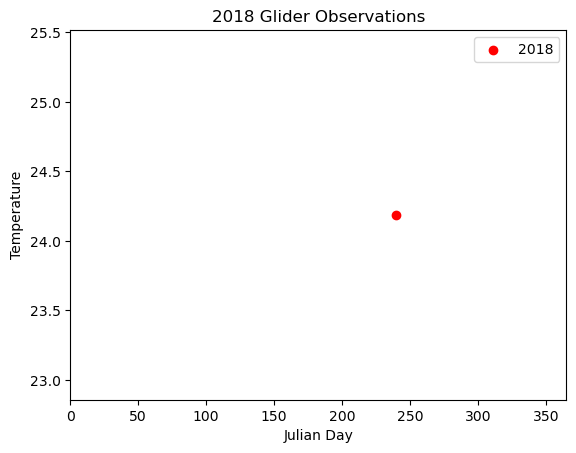

In [56]:
plt.scatter(gliders2018['day_of_year'], gliders2018['temperature'], color='red', label='2018')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2018 Glider Observations')
plt.legend()
plt.xlim(0,365)

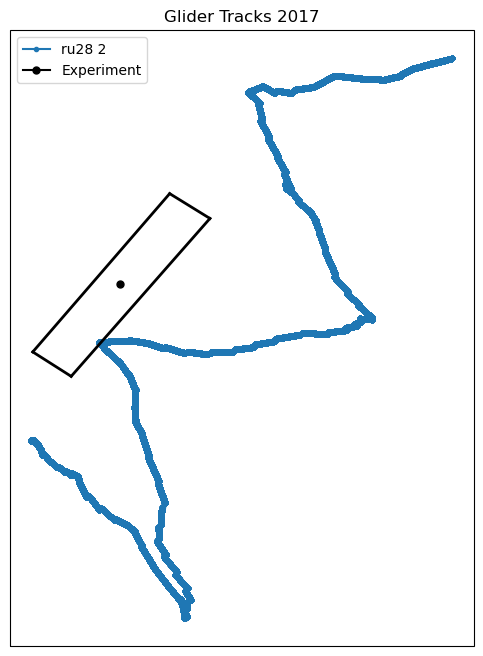

In [57]:
urls2017 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20170915T1416-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Cinstrument_vmt%2Clisst_timestamp%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2017-09-26T00%3A00%3A00Z&time%3C=2017-10-03T12%3A40%3A34Z',
]

url2017_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20170915T1416-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeam_c%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcdslk%2Cinstrument_lisst%2Cinstrument_optode%2Cinstrument_svs%2Cinstrument_vmt%2Clisst_timestamp%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_lisst_is_installed%2Csci_lisst_meansize%2Csci_lisst_qc_data1%2Csci_lisst_qc_data2%2Csci_lisst_qc_data3%2Csci_lisst_qc_data4%2Csci_lisst_qc_flag%2Csci_lisst_raw_lref%2Csci_lisst_rbn1_file%2Csci_lisst_rbn2_index%2Csci_lisst_totvol%2Csci_m_present_time%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2017-09-26T00%3A00%3A00Z&time%3C=2017-10-03T12%3A40%3A34Z':'ru28 2',
} 

data_by_url = {}

for url in urls2017:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2017_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2017')

ax.legend()
plt.show()

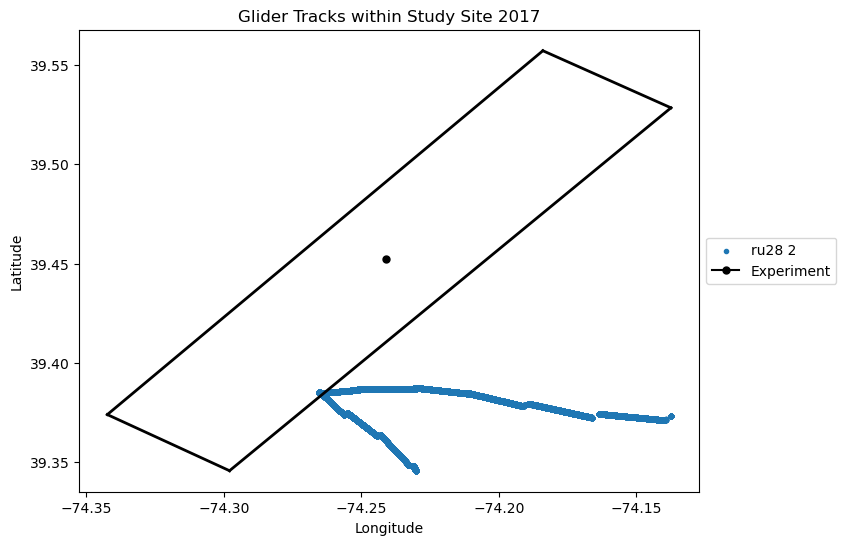

In [58]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2017_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2017')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [59]:
for url in urls2017:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2017 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2017 = data2017[(data2017['depth'] >= depth_min) & (data2017['depth'] <= depth_max)]
all_data_2017

time   latitude  longitude     depth  \
59     2017-09-26 00:01:05+00:00  39.713894 -73.857058  7.035749   
62     2017-09-26 00:01:07+00:00  39.713892 -73.857064  7.442604   
64     2017-09-26 00:01:09+00:00  39.713890 -73.857070  7.839536   
66     2017-09-26 00:01:11+00:00  39.713888 -73.857076  8.216620   
69     2017-09-26 00:01:13+00:00  39.713887 -73.857082  8.613550   
...                          ...        ...        ...       ...   
624395 2017-10-03 12:38:50+00:00  39.272086 -74.344240  8.236796   
624397 2017-10-03 12:38:52+00:00  39.272089 -74.344241  7.949010   
624398 2017-10-03 12:38:54+00:00  39.272092 -74.344242  7.700918   
624400 2017-10-03 12:38:57+00:00  39.272094 -74.344243  7.462750   
624401 2017-10-03 12:38:59+00:00  39.272097 -74.344243  7.194810   

                   trajectory  conductivity     density   salinity  \
59      ru28-20170915T1416-rt       4.42222  1021.49304  31.083834   
62      ru28-20170915T1416-rt       4.41959  1021.49030  31.072980   
64      ru28-20170915T1416-rt       4.41736  1021.50104  31.075193   
66      ru28-20170915T1416-rt       4.41565  1021.50860  31.075989   
69      ru28-20170915T1416-rt       4.41494  1021.51630  31.079346   
...                       ...           ...         ...        ...   
624395  ru28-20170915T1416-rt       4.36233  1021.53830  30.965342   
624397  ru28-20170915T1416-rt       4.36229  1021.53650  30.964754   
624398  ru28-20170915T1416-rt       4.36220  1021.53570  30.964846   
624400  ru28-20170915T1416-rt       4.36223  1021.53424  30.964579   
624401  ru28-20170915T1416-rt       4.36217  1021.53345  30.964770   

        temperature oxygen_saturation oxygen_concentration  
59          21.2199              None                 None  
62          21.2062              None                 None  
64          21.1788              None                 None  
66          21.1590              None                 None  
69          21.1465              None                 None  
...             ...               ...                  ...  
624395      20.7317              None                 None  
624397      20.7322              None                 None  
624398      20.7312              None                 None  
624400      20.7320              None                 None  
624401      20.7312              None                 None  

[53910 rows x 11 columns]

In [60]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2017.longitude,all_data_2017.latitude]).T)

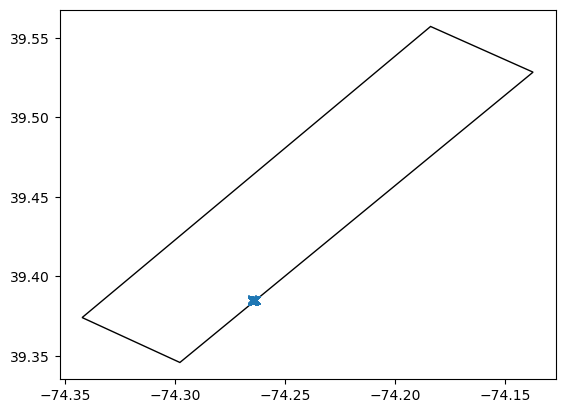

In [61]:
plt.plot(all_data_2017.longitude[mask],all_data_2017.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [62]:
data2017 = all_data_2017[mask]
data2017['time'] = pd.to_datetime(data2017['time'])
data2017

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\1998874323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2017['time'] = pd.to_datetime(data2017['time'])


time   latitude  longitude     depth  \
342663 2017-09-30 03:33:55+00:00  39.384936 -74.263488  9.655775   
342666 2017-09-30 03:33:57+00:00  39.384935 -74.263492  9.437458   
342668 2017-09-30 03:33:59+00:00  39.384935 -74.263496  9.209217   
342671 2017-09-30 03:34:01+00:00  39.384934 -74.263500  8.941283   
342673 2017-09-30 03:34:03+00:00  39.384934 -74.263504  8.693194   
...                          ...        ...        ...       ...   
344736 2017-09-30 04:19:49+00:00  39.384137 -74.264188  8.762660   
344737 2017-09-30 04:19:51+00:00  39.384133 -74.264186  8.564190   
344739 2017-09-30 04:19:53+00:00  39.384130 -74.264183  8.395490   
344741 2017-09-30 04:19:55+00:00  39.384127 -74.264181  8.077936   
344743 2017-09-30 04:19:57+00:00  39.384124 -74.264178  7.740534   

                   trajectory  conductivity     density   salinity  \
342663  ru28-20170915T1416-rt       4.46116  1021.44190  31.128600   
342666  ru28-20170915T1416-rt       4.46096  1021.44070  31.127903   
342668  ru28-20170915T1416-rt       4.46093  1021.44020  31.128319   
342671  ru28-20170915T1416-rt       4.46058  1021.43980  31.128128   
342673  ru28-20170915T1416-rt       4.46051  1021.44025  31.129320   
...                       ...           ...         ...        ...   
344736  ru28-20170915T1416-rt       4.46925  1021.43310  31.145357   
344737  ru28-20170915T1416-rt       4.46922  1021.43220  31.145258   
344739  ru28-20170915T1416-rt       4.46916  1021.43170  31.145350   
344741  ru28-20170915T1416-rt       4.46906  1021.43005  31.144886   
344743  ru28-20170915T1416-rt       4.46910  1021.42920  31.145592   

        temperature oxygen_saturation oxygen_concentration  
342663      21.5781              None                 None  
342666      21.5770              None                 None  
342668      21.5762              None                 None  
342671      21.5728              None                 None  
342673      21.5705              None                 None  
...             ...               ...                  ...  
344736      21.6426              None                 None  
344737      21.6425              None                 None  
344739      21.6418              None                 None  
344741      21.6415              None                 None  
344743      21.6411              None                 None  

[235 rows x 11 columns]

In [63]:
gliders2017 = data2017.groupby(data2017['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2017

time  latitude  longitude     depth             trajectory  \
0  2017-09-30  39.38479 -74.264532  8.493836  ru28-20170915T1416-rt   

   conductivity      density oxygen_concentration  salinity  temperature  \
0      4.463554  1021.439023                  NaN  31.13691    21.592943   

  oxygen_saturation  
0               NaN

In [64]:
gliders2017['time'] = pd.to_datetime(gliders2017['time'])
gliders2017['julian_day'] = Time(gliders2017['time']).jd
gliders2017 = pd.DataFrame(gliders2017)
gliders2017['time'] = pd.to_datetime(gliders2017['time'])
gliders2017['day_of_year'] = gliders2017['time'].dt.dayofyear
gliders2017.drop(columns=['julian_day'], inplace=True)
gliders2017['oxygen_concentration_mg_per_l'] = gliders2017['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2017

time  latitude  longitude     depth             trajectory  \
0 2017-09-30  39.38479 -74.264532  8.493836  ru28-20170915T1416-rt   

   conductivity      density oxygen_concentration  salinity  temperature  \
0      4.463554  1021.439023                  NaN  31.13691    21.592943   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          273                           NaN

(0.0, 365.0)

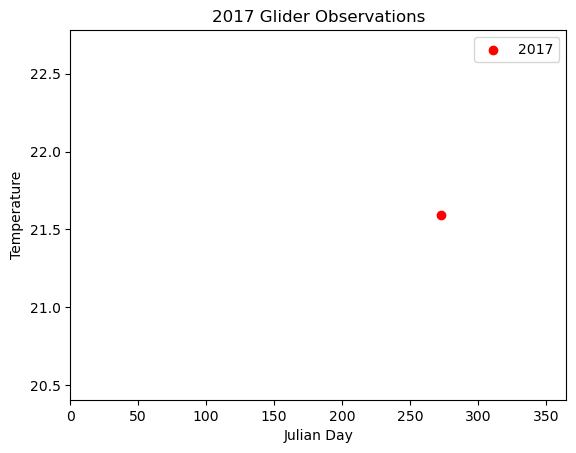

In [65]:
plt.scatter(gliders2017['day_of_year'], gliders2017['temperature'], color='red', label='2017')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2017 Glider Observations')
plt.legend()
plt.xlim(0,365)

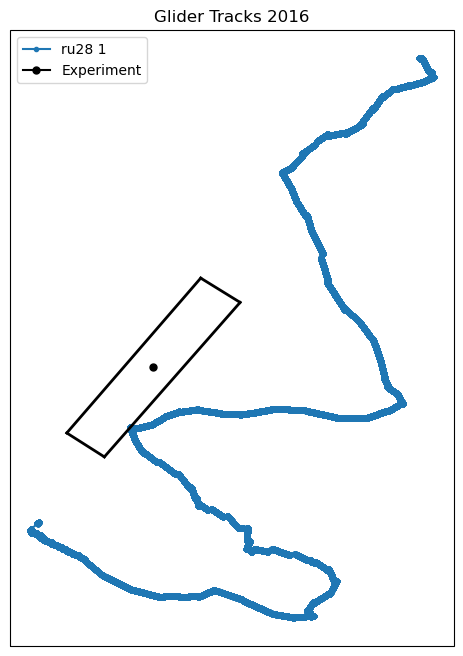

In [66]:
urls2016 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20160714T1410-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2016-07-18T00%3A00%3A00Z&time%3C=2016-07-25T15%3A41%3A39Z',
]

url2016_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20160714T1410-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2016-07-18T00%3A00%3A00Z&time%3C=2016-07-25T15%3A41%3A39Z':'ru28 1',
} 

data_by_url = {}

for url in urls2016:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2016_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2016')

ax.legend()
plt.show()

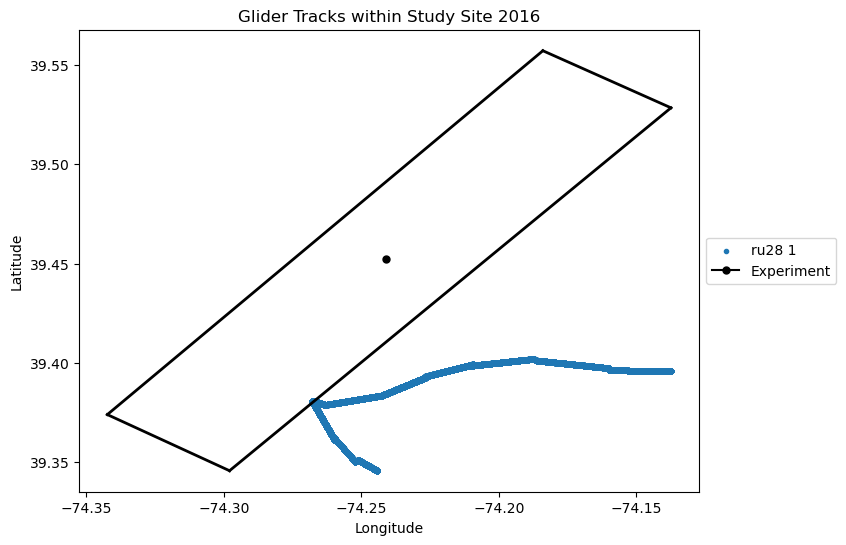

In [67]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2016_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2016')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [68]:

for url in urls2016:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity','temperature'])
    data['time'] = pd.to_datetime(data['time'])
    
    # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    if 'oxygen_saturation' not in data.columns:
        data['oxygen_saturation'] = None
    if 'oxygen_concentration' not in data.columns:
        data['oxygen_concentration'] = None

    data_by_url[url] = data

data2016 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2016 = data2016[(data2016['depth'] >= depth_min) & (data2016['depth'] <= depth_max)]
all_data_2016


time   latitude  longitude     depth  \
159    2016-07-18 00:02:15+00:00  39.816603 -73.925144  9.933243   
160    2016-07-18 00:02:16+00:00  39.816601 -73.925142  9.566089   
162    2016-07-18 00:02:18+00:00  39.816598 -73.925139  9.198935   
165    2016-07-18 00:02:20+00:00  39.816594 -73.925135  8.821856   
167    2016-07-18 00:02:22+00:00  39.816591 -73.925131  8.444776   
...                          ...        ...        ...       ...   
641691 2016-07-25 15:38:47+00:00  39.268248 -74.374819  8.524585   
641693 2016-07-25 15:38:49+00:00  39.268247 -74.374823  8.187181   
641694 2016-07-25 15:38:51+00:00  39.268245 -74.374827  7.820005   
641697 2016-07-25 15:38:53+00:00  39.268244 -74.374831  7.432982   
641699 2016-07-25 15:38:55+00:00  39.268242 -74.374835  7.075728   

                trajectory  conductivity     density   salinity  temperature  \
159     ru28-20160714T1410       4.41050  1021.87010  31.377548      20.6901   
160     ru28-20160714T1410       4.48913  1021.57640  31.319761      21.6153   
162     ru28-20160714T1410       4.54718  1021.32710  31.252760      22.3311   
165     ru28-20160714T1410       4.58035  1021.22217  31.249323      22.6912   
167     ru28-20160714T1410       4.64449  1021.07570  31.292044      23.3157   
...                    ...           ...         ...        ...          ...   
641691  ru28-20160714T1410       4.00409  1023.95984  32.346400      15.0491   
641693  ru28-20160714T1410       4.00153  1023.97380  32.355663      15.0102   
641694  ru28-20160714T1410       3.99899  1023.98730  32.364624      14.9719   
641697  ru28-20160714T1410       3.99617  1024.01100  32.382940      14.9193   
641699  ru28-20160714T1410       3.99432  1024.05770  32.425846      14.8477   

       oxygen_saturation oxygen_concentration  
159                 None                 None  
160                 None                 None  
162                 None                 None  
165                 None                 None  
167                 None                 None  
...                  ...                  ...  
641691              None                 None  
641693              None                 None  
641694              None                 None  
641697              None                 None  
641699              None                 None  

[45765 rows x 11 columns]

In [69]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2016.longitude,all_data_2016.latitude]).T)

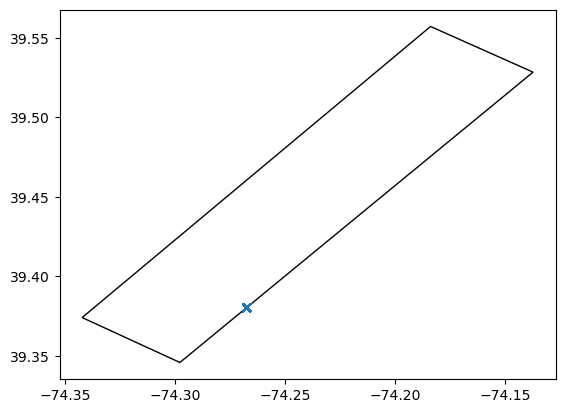

In [70]:
plt.plot(all_data_2016.longitude[mask],all_data_2016.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [71]:
data2016 = all_data_2016[mask]
data2016['time'] = pd.to_datetime(data2016['time'])
data2016

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\785198714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2016['time'] = pd.to_datetime(data2016['time'])


time   latitude  longitude     depth  \
330772 2016-07-21 19:11:49+00:00  39.380654 -74.267377  7.085580   
330773 2016-07-21 19:11:51+00:00  39.380656 -74.267382  7.363441   
330775 2016-07-21 19:11:53+00:00  39.380657 -74.267386  7.671072   
330777 2016-07-21 19:11:55+00:00  39.380659 -74.267391  7.998550   
330780 2016-07-21 19:11:57+00:00  39.380661 -74.267396  8.326027   
330782 2016-07-21 19:11:59+00:00  39.380663 -74.267400  8.663427   
330785 2016-07-21 19:12:01+00:00  39.380664 -74.267405  9.020675   
330786 2016-07-21 19:12:03+00:00  39.380666 -74.267409  9.387844   
330787 2016-07-21 19:12:05+00:00  39.380668 -74.267414  9.695473   
330789 2016-07-21 19:12:07+00:00  39.380670 -74.267419  9.933636   
330844 2016-07-21 19:12:56+00:00  39.380712 -74.267531  9.993176   
330847 2016-07-21 19:12:58+00:00  39.380714 -74.267536  9.745090   
330848 2016-07-21 19:13:01+00:00  39.380716 -74.267541  9.457309   
330851 2016-07-21 19:13:03+00:00  39.380718 -74.267545  9.119909   
330853 2016-07-21 19:13:05+00:00  39.380720 -74.267550  8.792434   
330855 2016-07-21 19:13:07+00:00  39.380721 -74.267554  8.544345   
330858 2016-07-21 19:13:09+00:00  39.380723 -74.267559  8.276409   
330860 2016-07-21 19:13:11+00:00  39.380725 -74.267564  7.919161   
330863 2016-07-21 19:13:13+00:00  39.380727 -74.267568  7.551989   
330865 2016-07-21 19:13:15+00:00  39.380728 -74.267573  7.224510   
331135 2016-07-21 19:25:39+00:00  39.380894 -74.267940  7.234434   
331137 2016-07-21 19:25:41+00:00  39.380889 -74.267937  7.522218   
331139 2016-07-21 19:25:43+00:00  39.380883 -74.267935  7.889391   
331142 2016-07-21 19:25:45+00:00  39.380877 -74.267933  8.355798   
331144 2016-07-21 19:25:47+00:00  39.380872 -74.267930  8.782510   
331145 2016-07-21 19:25:48+00:00  39.380869 -74.267929  9.139756   
331148 2016-07-21 19:25:50+00:00  39.380863 -74.267927  9.467232   
331149 2016-07-21 19:25:52+00:00  39.380858 -74.267924  9.884018   
331216 2016-07-21 19:26:51+00:00  39.380696 -74.267857  9.884018   
331217 2016-07-21 19:26:53+00:00  39.380691 -74.267854  9.576390   
331220 2016-07-21 19:26:55+00:00  39.380685 -74.267852  9.328303   
331222 2016-07-21 19:26:57+00:00  39.380679 -74.267849  9.040522   
331223 2016-07-21 19:26:59+00:00  39.380674 -74.267847  8.722969   
331226 2016-07-21 19:27:01+00:00  39.380668 -74.267845  8.435186   
331228 2016-07-21 19:27:03+00:00  39.380663 -74.267842  8.206944   
331231 2016-07-21 19:27:05+00:00  39.380657 -74.267840  7.978702   
331233 2016-07-21 19:27:07+00:00  39.380651 -74.267838  7.700842   
331236 2016-07-21 19:27:09+00:00  39.380646 -74.267835  7.462676   
331237 2016-07-21 19:27:11+00:00  39.380640 -74.267833  7.214587   
331314 2016-07-21 19:28:16+00:00  39.380459 -74.267757  7.174892   
331316 2016-07-21 19:28:18+00:00  39.380453 -74.267755  7.591683   
331318 2016-07-21 19:28:20+00:00  39.380448 -74.267752  7.948932   
331320 2016-07-21 19:28:22+00:00  39.380442 -74.267750  8.306180   
331321 2016-07-21 19:28:24+00:00  39.380436 -74.267748  8.683274   
331324 2016-07-21 19:28:26+00:00  39.380431 -74.267745  9.030598   
331326 2016-07-21 19:28:28+00:00  39.380425 -74.267743  9.387844   
331329 2016-07-21 19:28:31+00:00  39.380420 -74.267741  9.774860   
331401 2016-07-21 19:29:33+00:00  39.380247 -74.267668  9.903866   
331403 2016-07-21 19:29:35+00:00  39.380241 -74.267666  9.546620   
331406 2016-07-21 19:29:37+00:00  39.380236 -74.267664  9.229069   
331407 2016-07-21 19:29:38+00:00  39.380233 -74.267662  8.971057   
331409 2016-07-21 19:29:40+00:00  39.380227 -74.267660  8.713045   
331412 2016-07-21 19:29:42+00:00  39.380221 -74.267658  8.455033   
331414 2016-07-21 19:29:44+00:00  39.380216 -74.267655  8.197021   
331416 2016-07-21 19:29:46+00:00  39.380210 -74.267653  7.929085   
331418 2016-07-21 19:29:48+00:00  39.380205 -74.267651  7.680996   
331420 2016-07-21 19:29:50+00:00  39.380199 -74.267648  7.413059   
331422 2016-07-21 19:29:52+00:00  39.380194 -74.267646  7.115351   

               

In [72]:
gliders2016 = data2016.groupby(data2016['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2016

time   latitude  longitude     depth          trajectory  \
0  2016-07-21  39.380588  -74.26768  8.528431  ru28-20160714T1410   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.242639  1022.785236                  NaN  31.809147    18.305636   

  oxygen_saturation  
0               NaN

In [73]:
gliders2016['time'] = pd.to_datetime(gliders2016['time'])
gliders2016['julian_day'] = Time(gliders2016['time']).jd
gliders2016 = pd.DataFrame(gliders2016)
gliders2016['time'] = pd.to_datetime(gliders2016['time'])
gliders2016['day_of_year'] = gliders2016['time'].dt.dayofyear
gliders2016.drop(columns=['julian_day'], inplace=True)
gliders2016['oxygen_concentration_mg_per_l'] = gliders2016['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2016

time   latitude  longitude     depth          trajectory  \
0 2016-07-21  39.380588  -74.26768  8.528431  ru28-20160714T1410   

   conductivity      density oxygen_concentration   salinity  temperature  \
0      4.242639  1022.785236                  NaN  31.809147    18.305636   

  oxygen_saturation  day_of_year oxygen_concentration_mg_per_l  
0               NaN          203                           NaN

(0.0, 365.0)

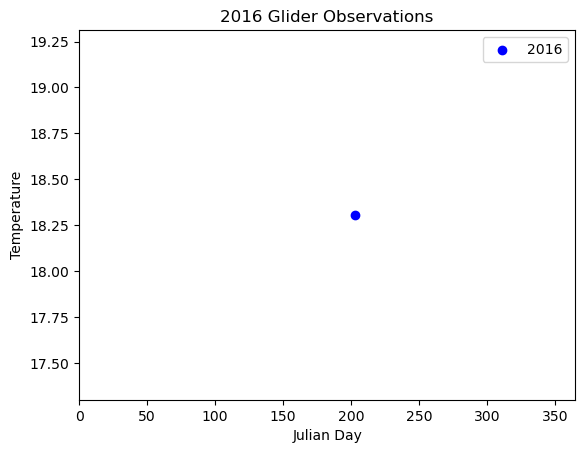

In [74]:
plt.scatter(gliders2016['day_of_year'], gliders2016['temperature'], color='blue', label='2016')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2016 Glider Observations')
plt.legend()
plt.xlim(0,365)

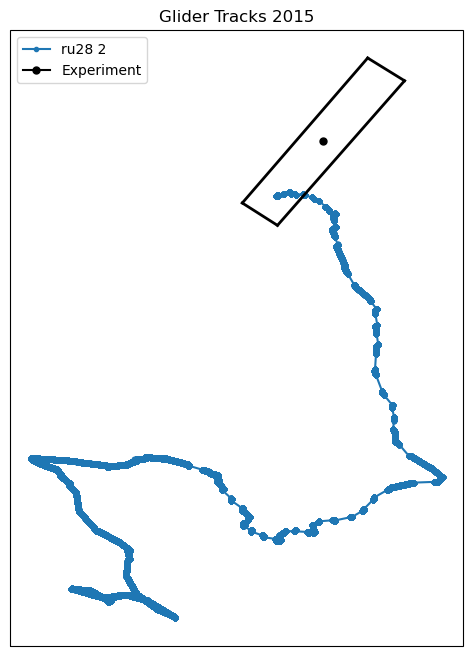

In [75]:
urls2015 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20150818T1506-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2015-09-02T00%3A00%3A00Z&time%3C=2015-09-09T12%3A59%3A55Z'
]

url2015_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20150818T1506-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2015-09-02T00%3A00%3A00Z&time%3C=2015-09-09T12%3A59%3A55Z':'ru28 2'
} 

data_by_url = {}

for url in urls2015:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2015_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2015')

ax.legend()
plt.show()

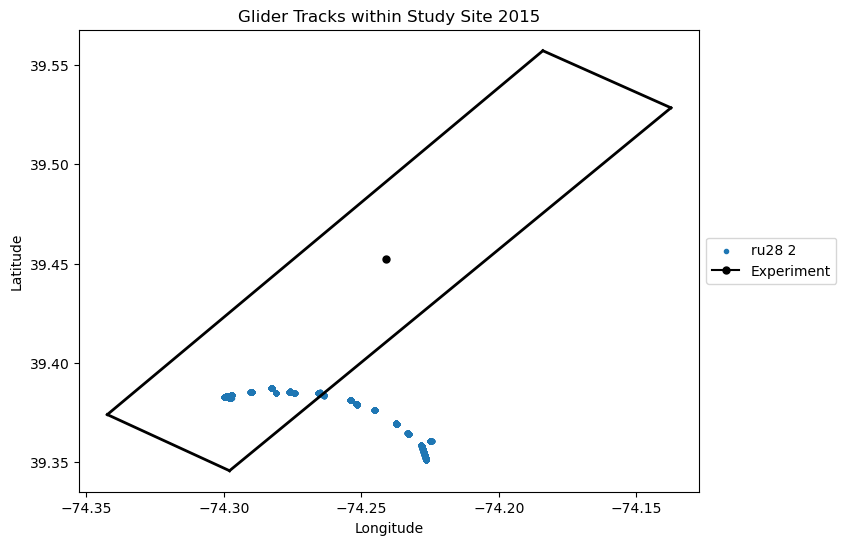

In [76]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2015_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2015')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [77]:
for url in urls2015:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature', 'oxygen_saturation', 'oxygen_concentration'])
    data['time'] = pd.to_datetime(data['time'])
    
    # # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    # if 'oxygen_saturation' not in data.columns:
    #     data['oxygen_saturation'] = None
    # if 'oxygen_concentration' not in data.columns:
    #     data['oxygen_concentration'] = None

    data_by_url[url] = data

data2015 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2015 = data2015[(data2015['depth'] >= depth_min) & (data2015['depth'] <= depth_max)]
all_data_2015

time   latitude  longitude     depth  \
53     2015-09-02 00:00:57+00:00  38.870448 -74.511835  9.983713   
55     2015-09-02 00:00:59+00:00  38.870449 -74.511833  9.685995   
57     2015-09-02 00:01:00+00:00  38.870449 -74.511832  9.398201   
59     2015-09-02 00:01:03+00:00  38.870450 -74.511829  9.100482   
61     2015-09-02 00:01:05+00:00  38.870450 -74.511828  8.792839   
...                          ...        ...        ...       ...   
295204 2015-09-09 12:57:55+00:00  39.382333 -74.297762  9.219143   
295207 2015-09-09 12:57:57+00:00  39.382332 -74.297769  8.941285   
295209 2015-09-09 12:57:59+00:00  39.382331 -74.297775  8.574115   
295213 2015-09-09 12:58:02+00:00  39.382329 -74.297785  7.661147   
295215 2015-09-09 12:58:05+00:00  39.382328 -74.297791  7.274127   

                trajectory  conductivity     density  oxygen_concentration  \
53      ru28-20150818T1506       4.62598  1021.23930                162.74   
55      ru28-20150818T1506       4.62837  1021.12000                166.26   
57      ru28-20150818T1506       4.62533  1021.08000                   NaN   
59      ru28-20150818T1506       4.62515  1021.07880                172.93   
61      ru28-20150818T1506       4.62564  1021.08105                176.93   
...                    ...           ...         ...                   ...   
295204  ru28-20150818T1506       4.66616  1021.76324                   NaN   
295207  ru28-20150818T1506       4.66966  1021.75696                   NaN   
295209  ru28-20150818T1506       4.68204  1021.77240                   NaN   
295213  ru28-20150818T1506       4.70389  1021.68670                   NaN   
295215  ru28-20150818T1506       4.71040  1021.67150                   NaN   

        oxygen_saturation   salinity  temperature  
53                  68.89  31.378874      22.9958  
55                  70.64  31.283148      23.1560  
57                    NaN  31.241772      23.1821  
59                  74.19  31.241423      23.1808  
61                  75.94  31.245853      23.1799  
...                   ...        ...          ...  
295204                NaN  31.942377      22.6396  
295207                NaN  31.947012      22.6701  
295209                NaN  31.993982      22.7357  
295213                NaN  31.979397      22.9849  
295215                NaN  31.984545      23.0461  

[20855 rows x 11 columns]

In [78]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2015.longitude,all_data_2015.latitude]).T)

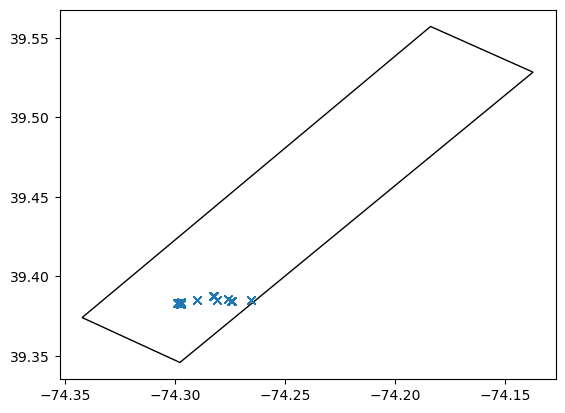

In [79]:
plt.plot(all_data_2015.longitude[mask],all_data_2015.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [80]:
data2015 = all_data_2015[mask]
data2015['time'] = pd.to_datetime(data2015['time'])
data2015

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\1781745098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2015['time'] = pd.to_datetime(data2015['time'])


time   latitude  longitude     depth  \
292434 2015-09-09 07:08:03+00:00  39.384974 -74.265386  7.343591   
292435 2015-09-09 07:08:04+00:00  39.384974 -74.265390  7.730610   
292438 2015-09-09 07:08:06+00:00  39.384974 -74.265398  8.157324   
292440 2015-09-09 07:08:08+00:00  39.384973 -74.265404  8.593960   
292442 2015-09-09 07:08:11+00:00  39.384973 -74.265411  9.020671   
...                          ...        ...        ...       ...   
295204 2015-09-09 12:57:55+00:00  39.382333 -74.297762  9.219143   
295207 2015-09-09 12:57:57+00:00  39.382332 -74.297769  8.941285   
295209 2015-09-09 12:57:59+00:00  39.382331 -74.297775  8.574115   
295213 2015-09-09 12:58:02+00:00  39.382329 -74.297785  7.661147   
295215 2015-09-09 12:58:05+00:00  39.382328 -74.297791  7.274127   

                trajectory  conductivity     density  oxygen_concentration  \
292434  ru28-20150818T1506       4.69617  1021.62180                   NaN   
292435  ru28-20150818T1506       4.68397  1021.65830                172.33   
292438  ru28-20150818T1506       4.66935  1021.69860                   NaN   
292440  ru28-20150818T1506       4.65462  1021.73960                   NaN   
292442  ru28-20150818T1506       4.63596  1021.79410                   NaN   
...                    ...           ...         ...                   ...   
295204  ru28-20150818T1506       4.66616  1021.76324                   NaN   
295207  ru28-20150818T1506       4.66966  1021.75696                   NaN   
295209  ru28-20150818T1506       4.68204  1021.77240                   NaN   
295213  ru28-20150818T1506       4.70389  1021.68670                   NaN   
295215  ru28-20150818T1506       4.71040  1021.67150                   NaN   

        oxygen_saturation   salinity  temperature  
292434                NaN  31.904144      23.0078  
292435              79.27  31.902735      22.8816  
292438                NaN  31.898320      22.7340  
292440                NaN  31.894330      22.5845  
292442                NaN  31.892230      22.3909  
...                   ...        ...          ...  
295204                NaN  31.942377      22.6396  
295207                NaN  31.947012      22.6701  
295209                NaN  31.993982      22.7357  
295213                NaN  31.979397      22.9849  
295215                NaN  31.984545      23.0461  

[240 rows x 11 columns]

In [81]:
gliders2015 = data2015.groupby(data2015['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2015

time   latitude  longitude     depth          trajectory  \
0  2015-09-09  39.384053 -74.290535  8.507169  ru28-20150818T1506   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      4.660975  1021.765891            149.046122  31.934518    22.595803   

   oxygen_saturation  
0          67.843776

In [82]:
gliders2015['time'] = pd.to_datetime(gliders2015['time'])
gliders2015['julian_day'] = Time(gliders2015['time']).jd
gliders2015 = pd.DataFrame(gliders2015)
gliders2015['time'] = pd.to_datetime(gliders2015['time'])
gliders2015['day_of_year'] = gliders2015['time'].dt.dayofyear
gliders2015.drop(columns=['julian_day'], inplace=True)
gliders2015['oxygen_concentration_mg_per_l'] = gliders2015['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2015

time   latitude  longitude     depth          trajectory  \
0 2015-09-09  39.384053 -74.290535  8.507169  ru28-20150818T1506   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      4.660975  1021.765891            149.046122  31.934518    22.595803   

   oxygen_saturation  day_of_year  oxygen_concentration_mg_per_l  
0          67.843776          252                       4.769476

(0.0, 365.0)

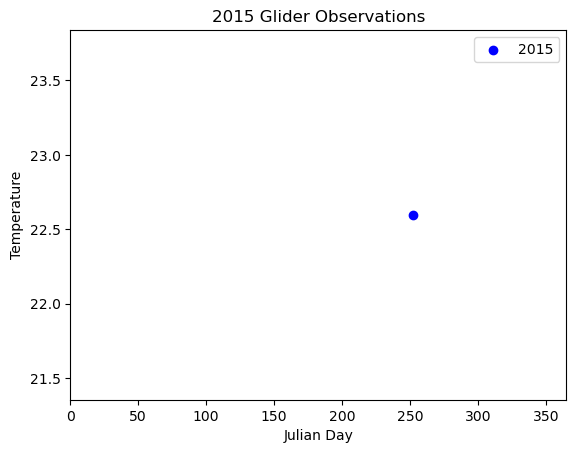

In [83]:
plt.scatter(gliders2015['day_of_year'], gliders2015['temperature'], color='blue', label='2015')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2015 Glider Observations')
plt.legend()
plt.xlim(0,365)

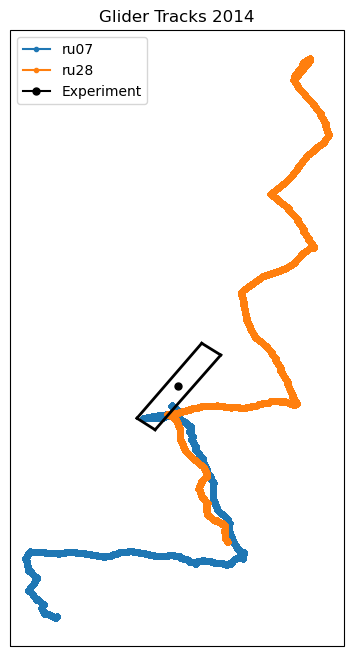

In [84]:
urls2014 = [
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru07-20140918T1310-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2014-10-02T00%3A00%3A00Z&time%3C=2014-10-09T13%3A26%3A58Z',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20140815T1405-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2014-08-29T00%3A00%3A00Z&time%3C=2014-09-05T12%3A17%3A36Z'
]

url2014_labels = {
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru07-20140918T1310-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_software_ver%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2014-10-02T00%3A00%3A00Z&time%3C=2014-10-09T13%3A26%3A58Z':'ru07',
    'https://slocum-data.marine.rutgers.edu/erddap/tabledap/ru28-20140815T1405-profile-sci-delayed.csv?time%2Clatitude%2Clongitude%2Cdepth%2Ctrajectory%2Csource_file%2Cbeta_700nm%2Cbeta_700nm_reference%2Cbeta_700nm_signal%2Ccdom%2Ccdom_reference%2Ccdom_signal%2Cchlorophyll_a%2Cconductivity%2Ccrs%2Cctd41cp_timestamp%2Cdensity%2Cflbbcd_timestamp%2Cglider_altitude%2Cinstrument_ctd%2Cinstrument_flbbcd%2Cinstrument_optode%2Cm_pitch%2Cm_roll%2Cm_science_clothesline_lag%2Coptode_water_temperature%2Coxy3835_timestamp%2Coxy3835_wphase_timestamp%2Coxygen_concentration%2Coxygen_saturation%2Cplatform%2Cpotential_temperature%2Cpressure%2Cprofile_id%2Cprofile_lat%2Cprofile_lon%2Cprofile_time%2Csalinity%2Csci_flbbcd_chlor_ref%2Csci_flbbcd_chlor_sig%2Csci_flbbcd_is_installed%2Csci_flbbcd_therm%2Csci_m_present_time%2Csci_oxy3835_is_installed%2Csci_oxy3835_temp%2Csci_oxy3835_wphase_bamp%2Csci_oxy3835_wphase_bphase%2Csci_oxy3835_wphase_bpot%2Csci_oxy3835_wphase_dphase%2Csci_oxy3835_wphase_is_installed%2Csci_oxy3835_wphase_ramp%2Csci_oxy3835_wphase_rawtemp%2Csci_oxy3835_wphase_rphase%2Csci_water_pressure%2Csound_speed%2Ctemperature%2Cu%2Cv%2Cwater_depth&time%3E=2014-08-29T00%3A00%3A00Z&time%3C=2014-09-05T12%3A17%3A36Z':'ru28'
}

data_by_url = {}

for url in urls2014:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['time', 'latitude', 'longitude'])
    data['time'] = pd.to_datetime(data['time'])
    data_by_url[url] = data

all_data = pd.concat(data_by_url.values(), ignore_index=True)

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

for url, data in data_by_url.items():
    label = url2014_labels.get(url, url) 
    ax.plot(data['longitude'], data['latitude'], marker='.', label=label, transform=ccrs.PlateCarree())

# Plot the box
for i in range(len(box_coords) - 1):
    ax.plot([box_coords[i][1], box_coords[i+1][1]],
            [box_coords[i][0], box_coords[i+1][0]],
            color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Close the polygon
ax.plot([box_coords[-1][1], box_coords[0][1]],
        [box_coords[-1][0], box_coords[0][0]],
        color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')
         
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glider Tracks 2014')

ax.legend()
plt.show()

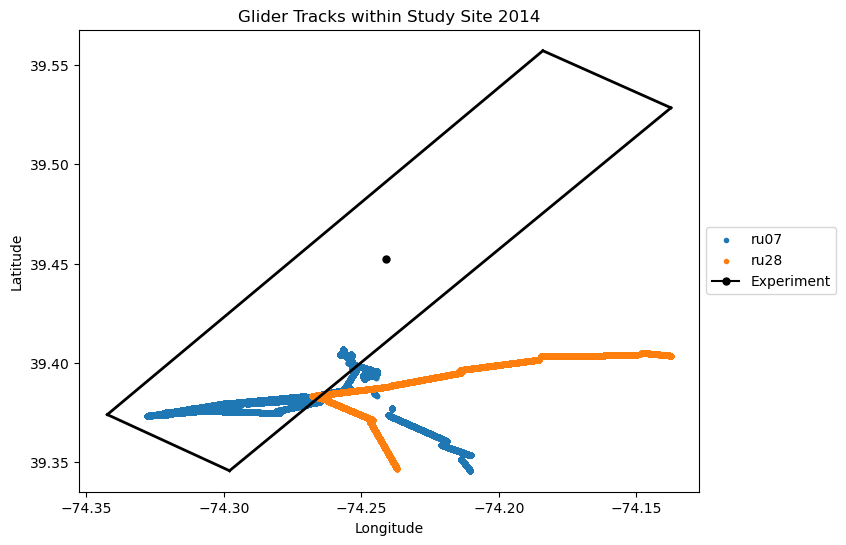

In [85]:
plt.figure(figsize=(8, 6))

plotted_labels = []

for url, data in data_by_url.items():
    label = url2014_labels.get(url, url)
    subset = data[(data['latitude'] >= latitude_min) & (data['latitude'] <= latitude_max) &
                  (data['longitude'] >= longitude_min) & (data['longitude'] <= longitude_max)]

    if not subset.empty:
        plt.scatter(subset['longitude'], subset['latitude'], marker='.', label=label)
        plotted_labels.append(label)

# Plot the box
for i in range(len(box_coords) - 1):
    plt.plot([box_coords[i][1], box_coords[i+1][1]],
             [box_coords[i][0], box_coords[i+1][0]],
             color='black', linestyle='-', linewidth=2)

# Close the polygon
plt.plot([box_coords[-1][1], box_coords[0][1]],
         [box_coords[-1][0], box_coords[0][0]],
         color='black', linestyle='-', linewidth=2)

# Plot the experiment point
plt.plot(-74.24087, 39.4524, marker='o', markersize=5, color='black', label='Experiment')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Glider Tracks within Study Site 2014')

# Plot Legend
plt.legend(handles=[], labels=plotted_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [86]:
for url in urls2014:
    data = pd.read_csv(url, sep=',', skiprows=[1], usecols=['trajectory', 'time', 'latitude', 'longitude', 'depth', 'conductivity', 'density', 'salinity', 'temperature', 'oxygen_concentration', 'oxygen_saturation'])
    data['time'] = pd.to_datetime(data['time'])
    
    # # Add 'oxygen_concentration' and 'oxygen_saturation' columns if they don't exist
    # if 'oxygen_saturation' not in data.columns:
    #     data['oxygen_saturation'] = None
    # if 'oxygen_concentration' not in data.columns:
    #     data['oxygen_concentration'] = None

    data_by_url[url] = data

data2014 = pd.concat(data_by_url.values(), ignore_index=True)
all_data_2014 = data2014[(data2014['depth'] >= depth_min) & (data2014['depth'] <= depth_max)]
all_data_2014


time   latitude  longitude     depth  \
36      2014-10-02 00:00:32+00:00  38.889311 -74.537377  9.636359   
38      2014-10-02 00:00:34+00:00  38.889313 -74.537379  9.259250   
41      2014-10-02 00:00:36+00:00  38.889314 -74.537381  8.852367   
43      2014-10-02 00:00:38+00:00  38.889316 -74.537383  8.425636   
46      2014-10-02 00:00:40+00:00  38.889317 -74.537385  8.028677   
...                           ...        ...        ...       ...   
1113017 2014-09-05 12:15:29+00:00  40.209080 -73.958782  9.148993   
1113020 2014-09-05 12:15:31+00:00  40.209076 -73.958783  8.742159   
1113022 2014-09-05 12:15:33+00:00  40.209073 -73.958783  8.295632   
1113025 2014-09-05 12:15:35+00:00  40.209069 -73.958784  7.868952   
1113027 2014-09-05 12:15:37+00:00  40.209065 -73.958784  7.442270   

                 trajectory  conductivity     density  oxygen_concentration  \
36       ru07-20140918T1310       4.52257  1022.25840                   NaN   
38       ru07-20140918T1310       4.52262  1022.25790                   NaN   
41       ru07-20140918T1310       4.52257  1022.25244                   NaN   
43       ru07-20140918T1310       4.52250  1022.25000                   NaN   
46       ru07-20140918T1310       4.52232  1022.24536                   NaN   
...                     ...           ...         ...                   ...   
1113017  ru28-20140815T1405       4.46704  1022.69934                   NaN   
1113020  ru28-20140815T1405       4.52877  1022.49960                   NaN   
1113022  ru28-20140815T1405       4.55859  1022.40610                   NaN   
1113025  ru28-20140815T1405       4.57977  1022.34310                   NaN   
1113027  ru28-20140815T1405       4.60617  1022.22290                115.97   

         oxygen_saturation   salinity  temperature  
36                     NaN  32.010850      21.0342  
38                     NaN  32.012043      21.0333  
41                     NaN  32.008710      21.0374  
43                     NaN  32.008070      21.0377  
46                     NaN  32.005054      21.0400  
...                    ...        ...          ...  
1113017                NaN  32.270287      20.1050  
1113020                NaN  32.246387      20.7871  
1113022                NaN  32.239700      21.1096  
1113025                NaN  32.238716      21.3334  
1113027              49.61  32.200600      21.6613  

[89131 rows x 11 columns]

In [87]:
p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([all_data_2014.longitude,all_data_2014.latitude]).T)

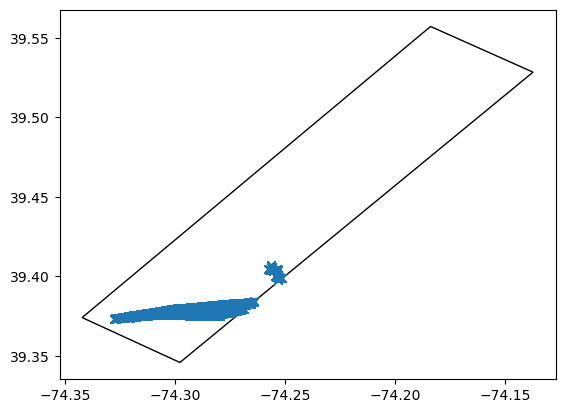

In [88]:
plt.plot(all_data_2014.longitude[mask],all_data_2014.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

In [89]:
data2014 = all_data_2014[mask]
data2014['time'] = pd.to_datetime(data2014['time'])
data2014

C:\Users\charl\AppData\Local\Temp\ipykernel_18196\1039053046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2014['time'] = pd.to_datetime(data2014['time'])


time   latitude  longitude     depth  \
455431 2014-10-08 06:21:37+00:00  39.398572 -74.251515  7.006179   
455433 2014-10-08 06:21:39+00:00  39.398573 -74.251517  7.164957   
455434 2014-10-08 06:21:41+00:00  39.398574 -74.251519  7.631365   
455436 2014-10-08 06:21:43+00:00  39.398575 -74.251522  8.177160   
455437 2014-10-08 06:21:45+00:00  39.398576 -74.251524  8.266473   
...                          ...        ...        ...       ...   
677268 2014-08-30 20:39:46+00:00  39.383895 -74.264567  8.345872   
677269 2014-08-30 20:39:48+00:00  39.383897 -74.264559  8.683272   
677271 2014-08-30 20:39:50+00:00  39.383898 -74.264552  9.020672   
677272 2014-08-30 20:39:52+00:00  39.383899 -74.264544  9.407688   
677275 2014-08-30 20:39:54+00:00  39.383901 -74.264535  9.874092   

                trajectory  conductivity     density  oxygen_concentration  \
455431  ru07-20140918T1310       4.33877  1022.08203                   NaN   
455433  ru07-20140918T1310       4.34033  1022.09174                   NaN   
455434  ru07-20140918T1310       4.34047  1022.09424                   NaN   
455436  ru07-20140918T1310       4.33876  1022.08660                   NaN   
455437  ru07-20140918T1310       4.34011  1022.09503                   NaN   
...                    ...           ...         ...                   ...   
677268  ru28-20140815T1405       4.58479  1020.72156                218.55   
677269  ru28-20140815T1405       4.58173  1020.73160                218.46   
677271  ru28-20140815T1405       4.57987  1020.76605                218.34   
677272  ru28-20140815T1405       4.58075  1020.78107                218.20   
677275  ru28-20140815T1405       4.58198  1020.79065                   NaN   

        oxygen_saturation   salinity  temperature  
455431                NaN  31.398245      19.8886  
455433                NaN  31.410276      19.8893  
455434                NaN  31.411032      19.8896  
455436                NaN  31.397556      19.8889  
455437                NaN  31.408210      19.8892  
...                   ...        ...          ...  
677268              99.03  30.830770      23.3328  
677269              98.98  30.830038      23.3007  
677271              98.92  30.853340      23.2471  
677272              98.86  30.867046      23.2368  
677275                NaN  30.876730      23.2360  

[10705 rows x 11 columns]

In [90]:
gliders2014 = data2014.groupby(data2014['time'].dt.date).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'depth': 'mean',
    'trajectory': 'first',
    'conductivity': 'mean',
    'density': 'mean',
    'oxygen_concentration': 'mean',
    'salinity': 'mean',
    'temperature': 'mean',
    'oxygen_saturation': 'mean'
}).reset_index()
gliders2014

time   latitude  longitude     depth          trajectory  \
0  2014-08-30  39.383265 -74.266306  8.526784  ru28-20140815T1405   
1  2014-10-08  39.392954 -74.270710  8.472267  ru07-20140918T1310   
2  2014-10-09  39.376474 -74.301027  8.495711  ru07-20140918T1310   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      4.583408  1020.740399            214.522105  30.842590    23.300865   
1      4.351849  1022.111243                   NaN  31.451608    19.957978   
2      4.345346  1022.151344                   NaN  31.471404    19.860976   

   oxygen_saturation  
0          97.123421  
1                NaN  
2                NaN

In [91]:
gliders2014['time'] = pd.to_datetime(gliders2014['time'])
gliders2014['julian_day'] = Time(gliders2014['time']).jd
gliders2014 = pd.DataFrame(gliders2014)
gliders2014['time'] = pd.to_datetime(gliders2014['time'])
gliders2014['day_of_year'] = gliders2014['time'].dt.dayofyear
gliders2014.drop(columns=['julian_day'], inplace=True)
gliders2014['oxygen_concentration_mg_per_l'] = gliders2014['oxygen_concentration'] * molar_mass_oxygen / 1000
gliders2014

time   latitude  longitude     depth          trajectory  \
0 2014-08-30  39.383265 -74.266306  8.526784  ru28-20140815T1405   
1 2014-10-08  39.392954 -74.270710  8.472267  ru07-20140918T1310   
2 2014-10-09  39.376474 -74.301027  8.495711  ru07-20140918T1310   

   conductivity      density  oxygen_concentration   salinity  temperature  \
0      4.583408  1020.740399            214.522105  30.842590    23.300865   
1      4.351849  1022.111243                   NaN  31.451608    19.957978   
2      4.345346  1022.151344                   NaN  31.471404    19.860976   

   oxygen_saturation  day_of_year  oxygen_concentration_mg_per_l  
0          97.123421          242                       6.864707  
1                NaN          281                            NaN  
2                NaN          282                            NaN

(0.0, 365.0)

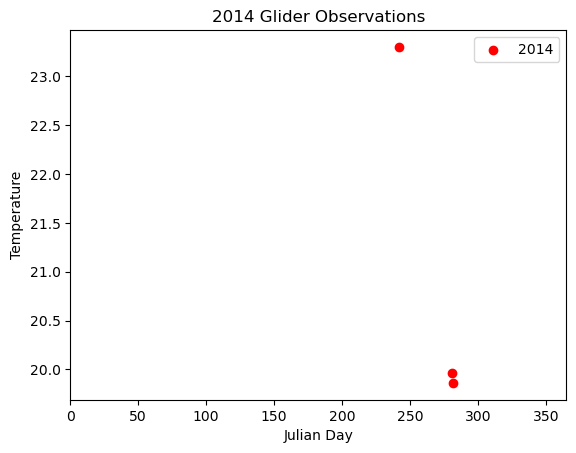

In [92]:
plt.scatter(gliders2014['day_of_year'], gliders2014['temperature'], color='red', label='2014')
plt.xlabel('Julian Day')
plt.ylabel('Temperature')
plt.title('2014 Glider Observations')
plt.legend()
plt.xlim(0,365)

(0.0, 365.0)

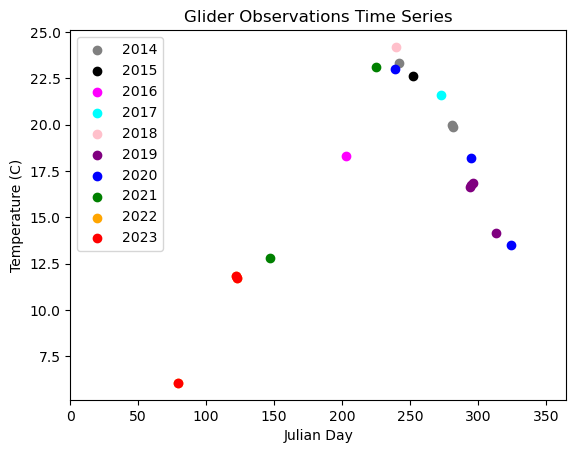

In [93]:
plt.scatter(gliders2014['day_of_year'], gliders2014['temperature'], color='gray', label='2014')
plt.scatter(gliders2015['day_of_year'], gliders2015['temperature'], color='black', label='2015')
plt.scatter(gliders2016['day_of_year'], gliders2016['temperature'], color='magenta', label='2016')
plt.scatter(gliders2017['day_of_year'], gliders2017['temperature'], color='cyan', label='2017')
plt.scatter(gliders2018['day_of_year'], gliders2018['temperature'], color='pink', label='2018')
plt.scatter(gliders2019['day_of_year'], gliders2019['temperature'], color='purple', label='2019')
plt.scatter(gliders2020['day_of_year'], gliders2020['temperature'], color='blue', label='2020')
plt.scatter(gliders2021['day_of_year'], gliders2021['temperature'], color='green', label='2021')
plt.scatter(gliders2022['day_of_year'], gliders2022['temperature'], color='orange', label='2022')
plt.scatter(gliders2023['day_of_year'], gliders2023['temperature'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Temperature (C)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0,365)

(0.0, 365.0)

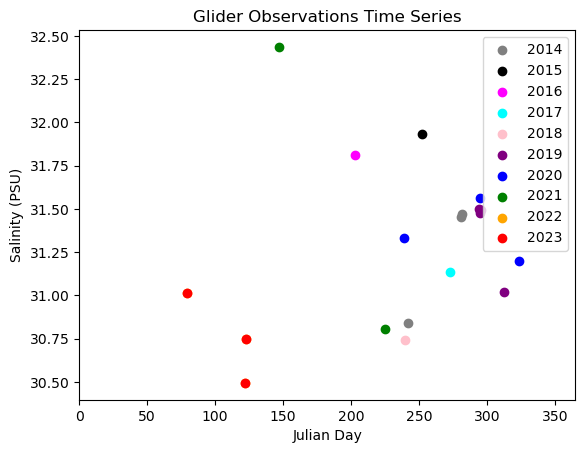

In [94]:
plt.scatter(gliders2014['day_of_year'], gliders2014['salinity'], color='gray', label='2014')
plt.scatter(gliders2015['day_of_year'], gliders2015['salinity'], color='black', label='2015')
plt.scatter(gliders2016['day_of_year'], gliders2016['salinity'], color='magenta', label='2016')
plt.scatter(gliders2017['day_of_year'], gliders2017['salinity'], color='cyan', label='2017')
plt.scatter(gliders2018['day_of_year'], gliders2018['salinity'], color='pink', label='2018')
plt.scatter(gliders2019['day_of_year'], gliders2019['salinity'], color='purple', label='2019')
plt.scatter(gliders2020['day_of_year'], gliders2020['salinity'], color='blue', label='2020')
plt.scatter(gliders2021['day_of_year'], gliders2021['salinity'], color='green', label='2021')
plt.scatter(gliders2022['day_of_year'], gliders2022['salinity'], color='orange', label='2022')
plt.scatter(gliders2023['day_of_year'], gliders2023['salinity'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Salinity (PSU)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)

(0.0, 365.0)

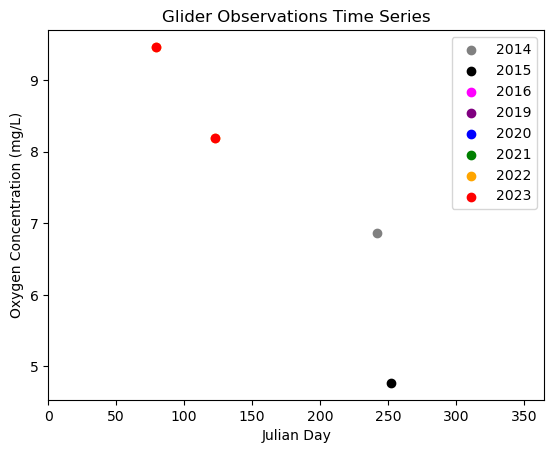

In [95]:
plt.scatter(gliders2014['day_of_year'], gliders2014['oxygen_concentration_mg_per_l'], color='gray', label='2014')
plt.scatter(gliders2015['day_of_year'], gliders2015['oxygen_concentration_mg_per_l'], color='black', label='2015')
plt.scatter(gliders2016['day_of_year'], gliders2016['oxygen_concentration_mg_per_l'], color='magenta', label='2016')
plt.scatter(gliders2019['day_of_year'], gliders2019['oxygen_concentration_mg_per_l'], color='purple', label='2019')
plt.scatter(gliders2020['day_of_year'], gliders2020['oxygen_concentration_mg_per_l'], color='blue', label='2020')
plt.scatter(gliders2021['day_of_year'], gliders2021['oxygen_concentration_mg_per_l'], color='green', label='2021')
plt.scatter(gliders2022['day_of_year'], gliders2022['oxygen_concentration_mg_per_l'], color='orange', label='2022')
plt.scatter(gliders2023['day_of_year'], gliders2023['oxygen_concentration_mg_per_l'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Oxygen Concentration (mg/L)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)

(0.0, 365.0)

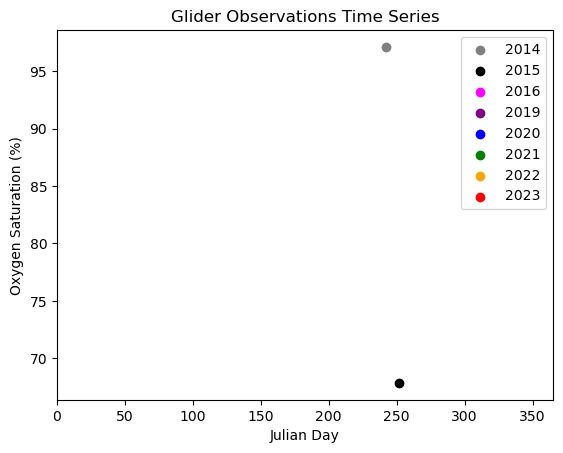

In [96]:
plt.scatter(gliders2014['day_of_year'], gliders2014['oxygen_saturation'], color='gray', label='2014')
plt.scatter(gliders2015['day_of_year'], gliders2015['oxygen_saturation'], color='black', label='2015')
plt.scatter(gliders2016['day_of_year'], gliders2016['oxygen_saturation'], color='magenta', label='2016')
plt.scatter(gliders2019['day_of_year'], gliders2019['oxygen_saturation'], color='purple', label='2019')
plt.scatter(gliders2020['day_of_year'], gliders2020['oxygen_saturation'], color='blue', label='2020')
plt.scatter(gliders2021['day_of_year'], gliders2021['oxygen_saturation'], color='green', label='2021')
plt.scatter(gliders2022['day_of_year'], gliders2022['oxygen_saturation'], color='orange', label='2022')
plt.scatter(gliders2023['day_of_year'], gliders2023['oxygen_saturation'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Oxygen Saturation (%)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)

(0.0, 365.0)

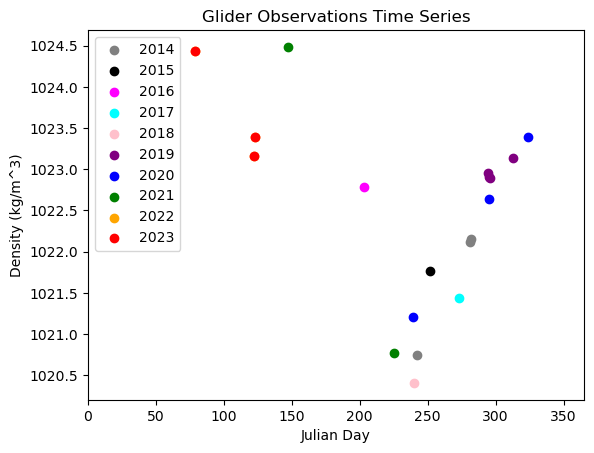

In [97]:
plt.scatter(gliders2014['day_of_year'], gliders2014['density'], color='gray', label='2014')
plt.scatter(gliders2015['day_of_year'], gliders2015['density'], color='black', label='2015')
plt.scatter(gliders2016['day_of_year'], gliders2016['density'], color='magenta', label='2016')
plt.scatter(gliders2017['day_of_year'], gliders2017['density'], color='cyan', label='2017')
plt.scatter(gliders2018['day_of_year'], gliders2018['density'], color='pink', label='2018')
plt.scatter(gliders2019['day_of_year'], gliders2019['density'], color='purple', label='2019')
plt.scatter(gliders2020['day_of_year'], gliders2020['density'], color='blue', label='2020')
plt.scatter(gliders2021['day_of_year'], gliders2021['density'], color='green', label='2021')
plt.scatter(gliders2022['day_of_year'], gliders2022['density'], color='orange', label='2022')
plt.scatter(gliders2023['day_of_year'], gliders2023['density'], color='red', label='2023')
plt.xlabel('Julian Day')
plt.ylabel('Density (kg/m^3)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)

(0.0, 365.0)

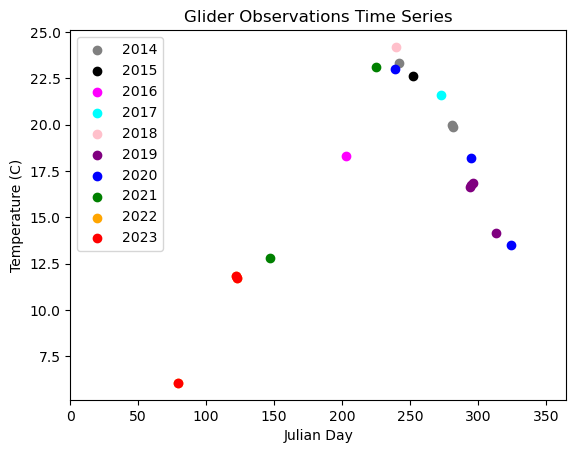

In [98]:
colors = ['gray', 'black', 'magenta', 'cyan', 'pink', 'purple', 'blue', 'green', 'orange', 'red']
years = range(2014, 2024)

for year, color in zip(years, colors):
    plt.scatter(locals()[f'gliders{year}']['day_of_year'], locals()[f'gliders{year}']['temperature'], color=color, label=str(year))

plt.xlabel('Julian Day')
plt.ylabel('Temperature (C)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)


(0.0, 365.0)

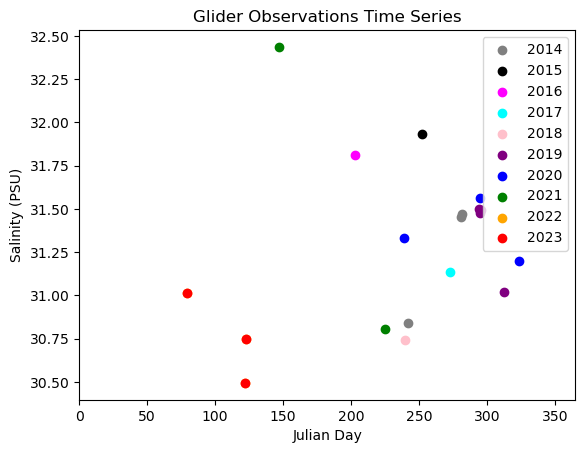

In [99]:
colors = ['gray', 'black', 'magenta', 'cyan', 'pink', 'purple', 'blue', 'green', 'orange', 'red']
years = range(2014, 2024)

for year, color in zip(years, colors):
    if f'gliders{year}' in globals():
        plt.scatter(locals()[f'gliders{year}']['day_of_year'], locals()[f'gliders{year}']['salinity'], color=color, label=str(year))

plt.xlabel('Julian Day')
plt.ylabel('Salinity (PSU)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)


(0.0, 365.0)

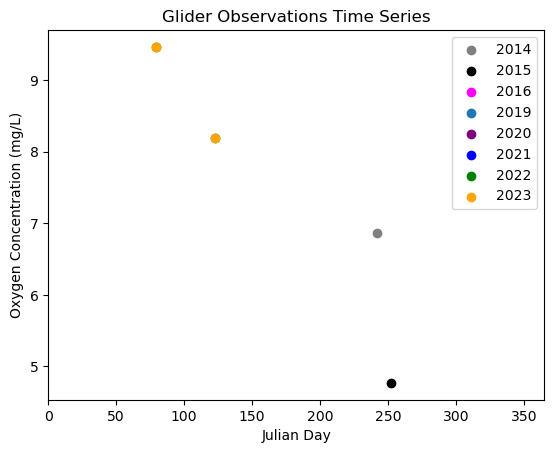

In [100]:
colors = ['gray', 'black', 'magenta', None, 'purple', 'blue', 'green', 'orange', 'red']
years = range(2014, 2024)
data_years = [2014, 2015, 2016, 2019, 2020, 2021, 2022, 2023]

for year, color in zip(data_years, colors):
    plt.scatter(locals()[f'gliders{year}']['day_of_year'], locals()[f'gliders{year}']['oxygen_concentration_mg_per_l'], color=color, label=str(year))

plt.xlabel('Julian Day')
plt.ylabel('Oxygen Concentration (mg/L)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)


(0.0, 365.0)

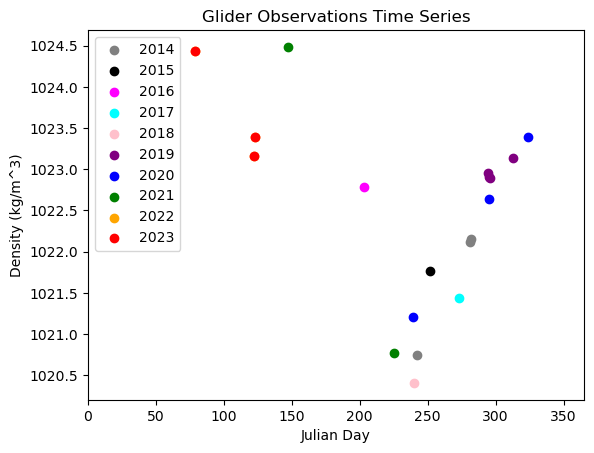

In [101]:
colors = ['gray', 'black', 'magenta', 'cyan', 'pink', 'purple', 'blue', 'green', 'orange', 'red']
years = range(2014, 2024)

for year, color in zip(years, colors):
    if f'gliders{year}' in globals():
        plt.scatter(locals()[f'gliders{year}']['day_of_year'], locals()[f'gliders{year}']['density'], color=color, label=str(year))

plt.xlabel('Julian Day')
plt.ylabel('Density (kg/m^3)')
plt.title('Glider Observations Time Series')
plt.legend()
plt.xlim(0, 365)


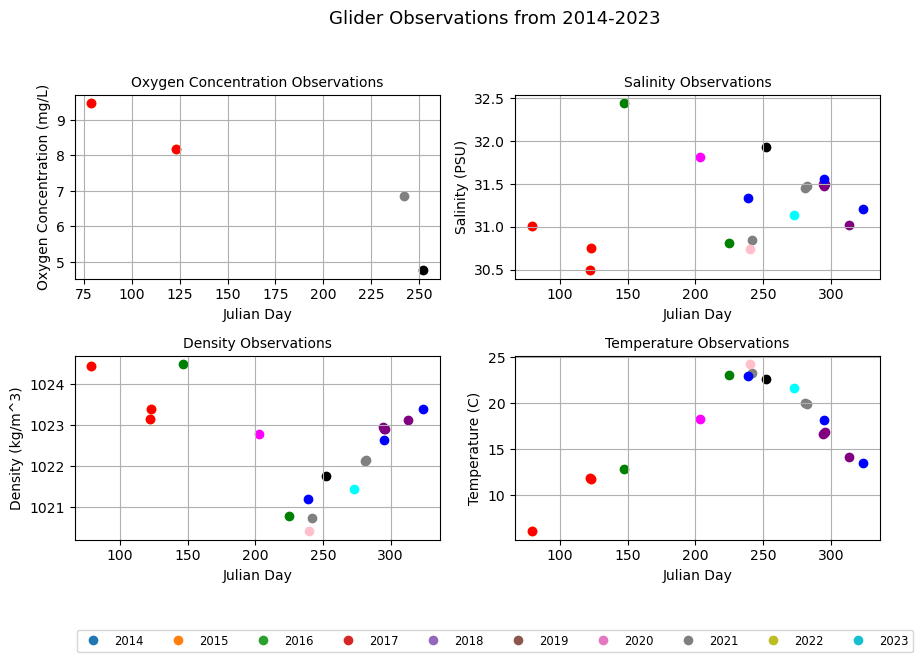

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

plt.suptitle('Glider Observations from 2014-2023', fontsize=13)

axs[0, 0].scatter(gliders2014['day_of_year'], gliders2014['oxygen_concentration_mg_per_l'], color='gray', label='2014')
axs[0, 0].scatter(gliders2015['day_of_year'], gliders2015['oxygen_concentration_mg_per_l'], color='black', label='2015')
axs[0, 0].scatter(gliders2016['day_of_year'], gliders2016['oxygen_concentration_mg_per_l'], color='magenta', label='2016')
axs[0, 0].scatter(gliders2019['day_of_year'], gliders2019['oxygen_concentration_mg_per_l'], color='purple', label='2019')
axs[0, 0].scatter(gliders2020['day_of_year'], gliders2020['oxygen_concentration_mg_per_l'], color='blue', label='2020')
axs[0, 0].scatter(gliders2021['day_of_year'], gliders2021['oxygen_concentration_mg_per_l'], color='green', label='2021')
axs[0, 0].scatter(gliders2022['day_of_year'], gliders2022['oxygen_concentration_mg_per_l'], color='orange', label='2022')
axs[0, 0].scatter(gliders2023['day_of_year'], gliders2023['oxygen_concentration_mg_per_l'], color='red', label='2023')
axs[0,0].grid(True)
axs[0, 0].set_xlabel('Julian Day', fontsize=10)
axs[0, 0].set_ylabel('Oxygen Concentration (mg/L)', fontsize=10)
axs[0, 0].set_title('Oxygen Concentration Observations', fontsize=10)

axs[0, 1].scatter(gliders2014['day_of_year'], gliders2014['salinity'], color='gray', label='2014')
axs[0, 1].scatter(gliders2015['day_of_year'], gliders2015['salinity'], color='black', label='2015')
axs[0, 1].scatter(gliders2016['day_of_year'], gliders2016['salinity'], color='magenta', label='2016')
axs[0, 1].scatter(gliders2017['day_of_year'], gliders2017['salinity'], color='cyan', label='2017')
axs[0, 1].scatter(gliders2018['day_of_year'], gliders2018['salinity'], color='pink', label='2018')
axs[0, 1].scatter(gliders2019['day_of_year'], gliders2019['salinity'], color='purple', label='2019')
axs[0, 1].scatter(gliders2020['day_of_year'], gliders2020['salinity'], color='blue', label='2020')
axs[0, 1].scatter(gliders2021['day_of_year'], gliders2021['salinity'], color='green', label='2021')
axs[0, 1].scatter(gliders2022['day_of_year'], gliders2022['salinity'], color='orange', label='2022')
axs[0, 1].scatter(gliders2023['day_of_year'], gliders2023['salinity'], color='red', label='2023')
axs[0,1].grid(True)
axs[0, 1].set_xlabel('Julian Day', fontsize=10)
axs[0, 1].set_ylabel('Salinity (PSU)', fontsize=10)
axs[0, 1].set_title('Salinity Observations', fontsize=10)

axs[1, 0].scatter(gliders2014['day_of_year'], gliders2014['density'], color='gray', label='2014')
axs[1, 0].scatter(gliders2015['day_of_year'], gliders2015['density'], color='black', label='2015')
axs[1, 0].scatter(gliders2016['day_of_year'], gliders2016['density'], color='magenta', label='2016')
axs[1, 0].scatter(gliders2017['day_of_year'], gliders2017['density'], color='cyan', label='2017')
axs[1, 0].scatter(gliders2018['day_of_year'], gliders2018['density'], color='pink', label='2018')
axs[1, 0].scatter(gliders2019['day_of_year'], gliders2019['density'], color='purple', label='2019')
axs[1, 0].scatter(gliders2020['day_of_year'], gliders2020['density'], color='blue', label='2020')
axs[1, 0].scatter(gliders2021['day_of_year'], gliders2021['density'], color='green', label='2021')
axs[1, 0].scatter(gliders2022['day_of_year'], gliders2022['density'], color='orange', label='2022')
axs[1, 0].scatter(gliders2023['day_of_year'], gliders2023['density'], color='red', label='2023')
axs[1,0].grid(True)
axs[1, 0].set_xlabel('Julian Day', fontsize=10)
axs[1, 0].set_ylabel('Density (kg/m^3)', fontsize=10)
axs[1, 0].set_title('Density Observations', fontsize=10)

axs[1, 1].scatter(gliders2014['day_of_year'], gliders2014['temperature'], color='gray', label='2014')
axs[1, 1].scatter(gliders2015['day_of_year'], gliders2015['temperature'], color='black', label='2015')
axs[1, 1].scatter(gliders2016['day_of_year'], gliders2016['temperature'], color='magenta', label='2016')
axs[1, 1].scatter(gliders2017['day_of_year'], gliders2017['temperature'], color='cyan', label='2017')
axs[1, 1].scatter(gliders2018['day_of_year'], gliders2018['temperature'], color='pink', label='2018')
axs[1, 1].scatter(gliders2019['day_of_year'], gliders2019['temperature'], color='purple', label='2019')
axs[1, 1].scatter(gliders2020['day_of_year'], gliders2020['temperature'], color='blue', label='2020')
axs[1, 1].scatter(gliders2021['day_of_year'], gliders2021['temperature'], color='green', label='2021')
axs[1, 1].scatter(gliders2022['day_of_year'], gliders2022['temperature'], color='orange', label='2022')
axs[1, 1].scatter(gliders2023['day_of_year'], gliders2023['temperature'], color='red', label='2023')
axs[1,1].grid(True)
axs[1, 1].set_xlabel('Julian Day', fontsize=10)
axs[1, 1].set_ylabel('Temperature (C)', fontsize=10)
axs[1, 1].set_title('Temperature Observations', fontsize=10)

handles, labels = [], []
for year in range(2014, 2024):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{year-2014}', markersize=8))
    labels.append(str(year))
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels), fontsize='small')
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

plt.show()


## Import Necessary Packages

In [103]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cool_maps.plot as cplt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import cartopy.crs as crs
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seawater
import matplotlib.gridspec as gridspec

## Becca needs to add these
import netCDF4  #install new package from conda-forge
import cmocean #install new package from conda-forge
import cmocean.cm as cmo
import matplotlib.dates as mdates

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from matplotlib import rcParams
import cartopy.feature as cfeature

from cartopy import config
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm
# %matplotlib inline
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
hfont = {'fontname':'Helvetica'}

## Load the data (the actual URL to look at all the data is here: https://tds.marine.rutgers.edu/thredds/roms/doppio/catalog.html)

In [104]:
#We are using the thredds server URL to access the data, but you can't actually click on it to see what the link is
url = "https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/DopAnV3R3-ini2007_da/mon_avg"
#basically this means we are taking the doppio version 3 run 3 of monthly averages and loading them into our notebook as a dataset


ds = xr.open_dataset(url)
ds = xr.open_dataset(url,decode_times = True) #change to decode_times = False
ds

<xarray.Dataset>
Dimensions:      (s_rho: 40, s_w: 41, eta_rho: 106, xi_rho: 242, eta_u: 106,
                  xi_u: 241, eta_v: 105, xi_v: 242, eta_psi: 105, xi_psi: 241,
                  ocean_time: 204)
Coordinates:
  * s_rho        (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w          (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho      (eta_rho, xi_rho) float64 ...
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_u        (eta_u, xi_u) float64 ...
    lat_u        (eta_u, xi_u) float64 ...
    lon_v        (eta_v, xi_v) float64 ...
    lat_v        (eta_v, xi_v) float64 ...
    lon_psi      (eta_psi, xi_psi) float64 ...
    lat_psi      (eta_psi, xi_psi) float64 ...
  * ocean_time   (ocean_time) datetime64[ns] 2007-01-17 ... 2023-12-16
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v,
                                eta_psi, xi_psi
Data variables: (12/33)
    spherical    int32 ...
    xl           float64 ...
    el           float64 ...
    Vtransform   int32 ...
    Vstretching  int32 ...
    theta_s      float64 ...
    ...           ...
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    shflux       (ocean_time, eta_rho, xi_rho) float64 ...
    ssflux       (ocean_time, eta_rho, xi_rho) float64 ...
    swrad_daily  (ocean_time, eta_rho, xi_rho) float64 ...
    sustr        (ocean_time, eta_u, xi_u) float64 ...
    svstr        (ocean_time, eta_v, xi_v) float64 ...
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

# So `ds` is the entire dataset in time and space for Doppio. If we want to visualize what that looks like, we can first look at the dataset and see it's 106x242

In [105]:
ds

<xarray.Dataset>
Dimensions:      (s_rho: 40, s_w: 41, eta_rho: 106, xi_rho: 242, eta_u: 106,
                  xi_u: 241, eta_v: 105, xi_v: 242, eta_psi: 105, xi_psi: 241,
                  ocean_time: 204)
Coordinates:
  * s_rho        (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w          (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho      (eta_rho, xi_rho) float64 ...
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_u        (eta_u, xi_u) float64 ...
    lat_u        (eta_u, xi_u) float64 ...
    lon_v        (eta_v, xi_v) float64 ...
    lat_v        (eta_v, xi_v) float64 ...
    lon_psi      (eta_psi, xi_psi) float64 ...
    lat_psi      (eta_psi, xi_psi) float64 ...
  * ocean_time   (ocean_time) datetime64[ns] 2007-01-17 ... 2023-12-16
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v,
                                eta_psi, xi_psi
Data variables: (12/33)
    spherical    int32 ...
    xl           float64 ...
    el           float64 ...
    Vtransform   int32 ...
    Vstretching  int32 ...
    theta_s      float64 ...
    ...           ...
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    shflux       (ocean_time, eta_rho, xi_rho) float64 ...
    ssflux       (ocean_time, eta_rho, xi_rho) float64 ...
    swrad_daily  (ocean_time, eta_rho, xi_rho) float64 ...
    sustr        (ocean_time, eta_u, xi_u) float64 ...
    svstr        (ocean_time, eta_v, xi_v) float64 ...
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

In [106]:
my_lon1=-74.24087
my_lat1=39.4524
ds1 = abs(ds.lat_rho-my_lat1)+abs(ds.lon_rho-my_lon1)
a,b = np.unravel_index(ds1.argmin(),ds1.shape)

In [107]:
ds2=ds.sel(eta_rho=a, xi_rho=b)

if ds2.Vtransform == 1:
        Zo_rho = ds2.hc * (ds2.s_rho - ds2.Cs_r) + ds2.Cs_r * ds2.h
        z_rho = Zo_rho + ds2.zeta * (1 + Zo_rho/ds2.h)
elif ds2.Vtransform == 2:
        Zo_rho = (ds2.hc * ds2.s_rho + ds2.Cs_r * ds2.h) / (ds2.hc + ds2.h)
        z_rho = ds2.zeta + (ds2.zeta + ds2.h) * Zo_rho

ds2.coords['z_rho'] = z_rho.transpose()

In [108]:
variables = ['temp','z_rho']
ds_sub=ds2[variables]
ds_sub

<xarray.Dataset>
Dimensions:     (ocean_time: 204, s_rho: 40)
Coordinates:
    z_rho       (s_rho, ocean_time) float64 -14.46 -14.47 ... -0.175 -0.1937
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
    lon_rho     float64 -74.23
    lat_rho     float64 39.43
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2023-12-16
Data variables:
    temp        (ocean_time, s_rho) float64 ...
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

In [109]:
bottom=ds_sub.isel(s_rho=[0])
bottom

<xarray.Dataset>
Dimensions:     (ocean_time: 204, s_rho: 1)
Coordinates:
    z_rho       (s_rho, ocean_time) float64 -14.46 -14.47 ... -14.46 -14.46
  * s_rho       (s_rho) float64 -0.9875
    lon_rho     float64 -74.23
    lat_rho     float64 39.43
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2023-12-16
Data variables:
    temp        (ocean_time, s_rho) float64 ...
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

In [110]:
gb1=bottom.groupby(bottom.ocean_time.dt.month) 
gb1

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [111]:
ds_avg=gb1.mean(dim='ocean_time')
ds_avg

<xarray.Dataset>
Dimensions:  (month: 12, s_rho: 1)
Coordinates:
  * s_rho    (s_rho) float64 -0.9875
    lon_rho  float64 -74.23
    lat_rho  float64 39.43
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    temp     (month, s_rho) float64 5.576 4.161 5.029 ... 18.49 13.53 9.056
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

In [112]:
bottom["month"]=bottom.ocean_time.dt.month
bottom["year"]=bottom.ocean_time.dt.year

gb_year=bottom.groupby(bottom.ocean_time.dt.year) 
gb_year


DatasetGroupBy, grouped over 'year'
17 groups with labels 2007, 2008, 2009, ..., 2022, 2023.

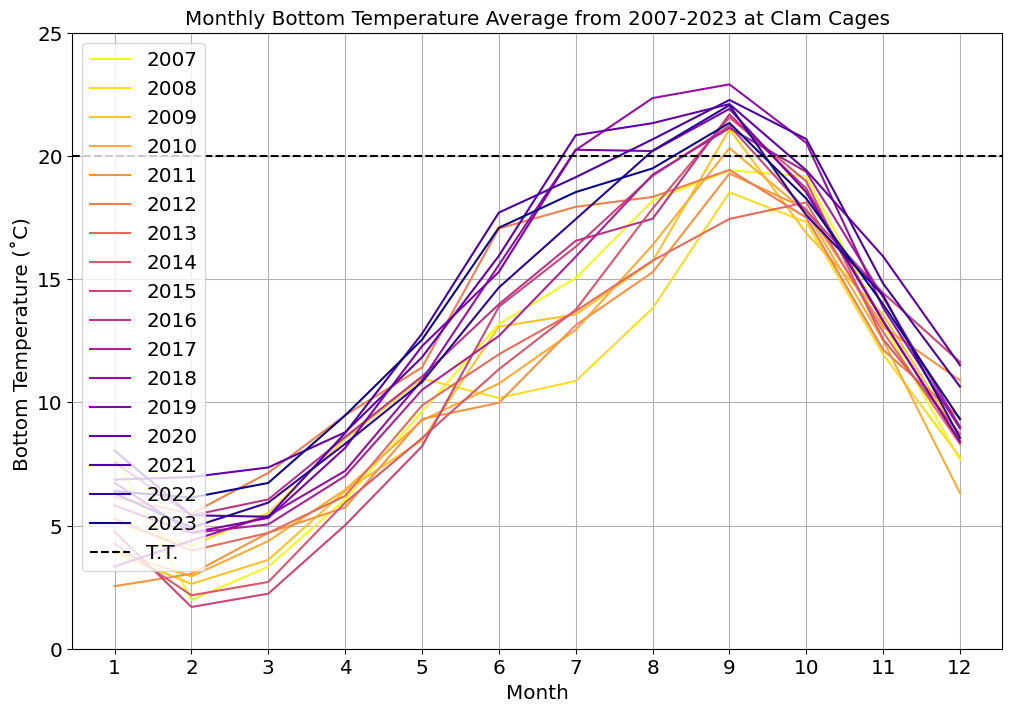

In [113]:
#let's look at this plotted

cmap = plt.get_cmap('plasma_r')

fig=plt.figure(figsize=[12,8])

for year in range(2007, 2024):
    plt.plot(gb_year[year].month, gb_year[year].temp, label=str(year), color=cmap((year-2007)/(2023-2007)))

plt.grid(True)
plt.xticks(np.arange(1, 13, 1))
plt.axhline(y=20, color='black', linestyle='--', label='T.T.')
plt.title("Monthly Bottom Temperature Average from 2007-2023 at Clam Cages")
plt.xlabel("Month")
plt.ylabel("Bottom Temperature (˚C) ");
plt.ylim(0,25)
plt.legend()
plt.show()


In [114]:
#we want to combine all the gliders to plot over the ROMS data

all_gliders = pd.concat([gliders2014,gliders2015,gliders2016,gliders2017,gliders2019,gliders2020,gliders2021,gliders2022,gliders2023])
all_gliders.reset_index(drop=True, inplace=True)
all_gliders

time   latitude  longitude     depth                 trajectory  \
0  2014-08-30  39.383265 -74.266306  8.526784         ru28-20140815T1405   
1  2014-10-08  39.392954 -74.270710  8.472267         ru07-20140918T1310   
2  2014-10-09  39.376474 -74.301027  8.495711         ru07-20140918T1310   
3  2015-09-09  39.384053 -74.290535  8.507169         ru28-20150818T1506   
4  2016-07-21  39.380588 -74.267680  8.528431         ru28-20160714T1410   
5  2017-09-30  39.384790 -74.264532  8.493836      ru28-20170915T1416-rt   
6  2019-10-21  39.363794 -74.293567  8.491461         ru28-20190926T1413   
7  2019-10-22  39.363068 -74.296118  8.479733         ru28-20190926T1413   
8  2019-10-23  39.356793 -74.298596  8.520756         ru28-20190926T1413   
9  2019-11-09  39.419875 -74.247896  8.479408         ru22-20191014T1645   
10 2020-08-26  39.410457 -74.248894  8.402403         ru34-20200729T1430   
11 2020-10-21  39.432330 -74.224116  8.416465         ru28-20201009T1155   
12 2020-11-19  39.387057 -74.273672  8.523160         ru28-20201028T1927   
13 2021-05-27  39.451132 -74.208284  8.480827         ru30-20210503T1929   
14 2021-08-13  39.451881 -74.220008  8.498309  maracoos_02-20210716T1814   
15 2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
16 2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
17 2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   
18 2023-03-20  39.446103 -74.214159  8.417690  maracoos_04-20230221T1724   
19 2023-05-02  39.440253 -74.216171  8.497326     unit_648-20230324T1507   
20 2023-05-03  39.435255 -74.221030  8.735458     unit_648-20230324T1507   

    conductivity      density oxygen_concentration   salinity  temperature  \
0       4.583408  1020.740399           214.522105  30.842590    23.300865   
1       4.351849  1022.111243                  NaN  31.451608    19.957978   
2       4.345346  1022.151344                  NaN  31.471404    19.860976   
3       4.660975  1021.765891           149.046122  31.934518    22.595803   
4       4.242639  1022.785236                  NaN  31.809147    18.305636   
5       4.463554  1021.439023                  NaN  31.136910    21.592943   
6       4.054043  1022.952152                  NaN  31.497328    16.649146   
7       4.062151  1022.911556                  NaN  31.478373    16.762568   
8       4.073235  1022.898596                  NaN  31.492470    16.866706   
9       3.775359  1023.132316                  NaN  31.022148    14.128233   
10      4.617372  1021.204783                  NaN  31.333148    22.969531   
11      4.202499  1022.636038                  NaN  31.560648    18.194079   
12      3.740526  1023.395274                  NaN  31.201660    13.511148   
13      3.810367  1024.484240                  NaN  32.436555    12.818370   
14      4.558984  1020.771542                  NaN  30.805470    23.091320   
15      3.087268  1024.436914           295.789589  31.013325     6.067368   
16      3.522183  1023.160573                  NaN  30.494229    11.859333   
17      3.535199  1023.387628           255.863375  30.748636    11.700737   
18      3.087268  1024.436914           295.789589  31.013325     6.067368   
19      3.522183  1023.160573                  NaN  30.494229    11.859333   
20      3.535199  1023.387628           255.863375  30.748636    11.700737   

   oxygen_saturation  day_of_year  oxygen_concentration_mg_per_l  
0          97.123421          242                       6.864707  
1                NaN          281                            NaN  
2                NaN          282                            NaN  
3          67.843776          252                       4.769476  
4                NaN          203                            NaN  
5                NaN          273                            NaN  
6                NaN          294                            NaN  
7                NaN          295                            NaN  
8               

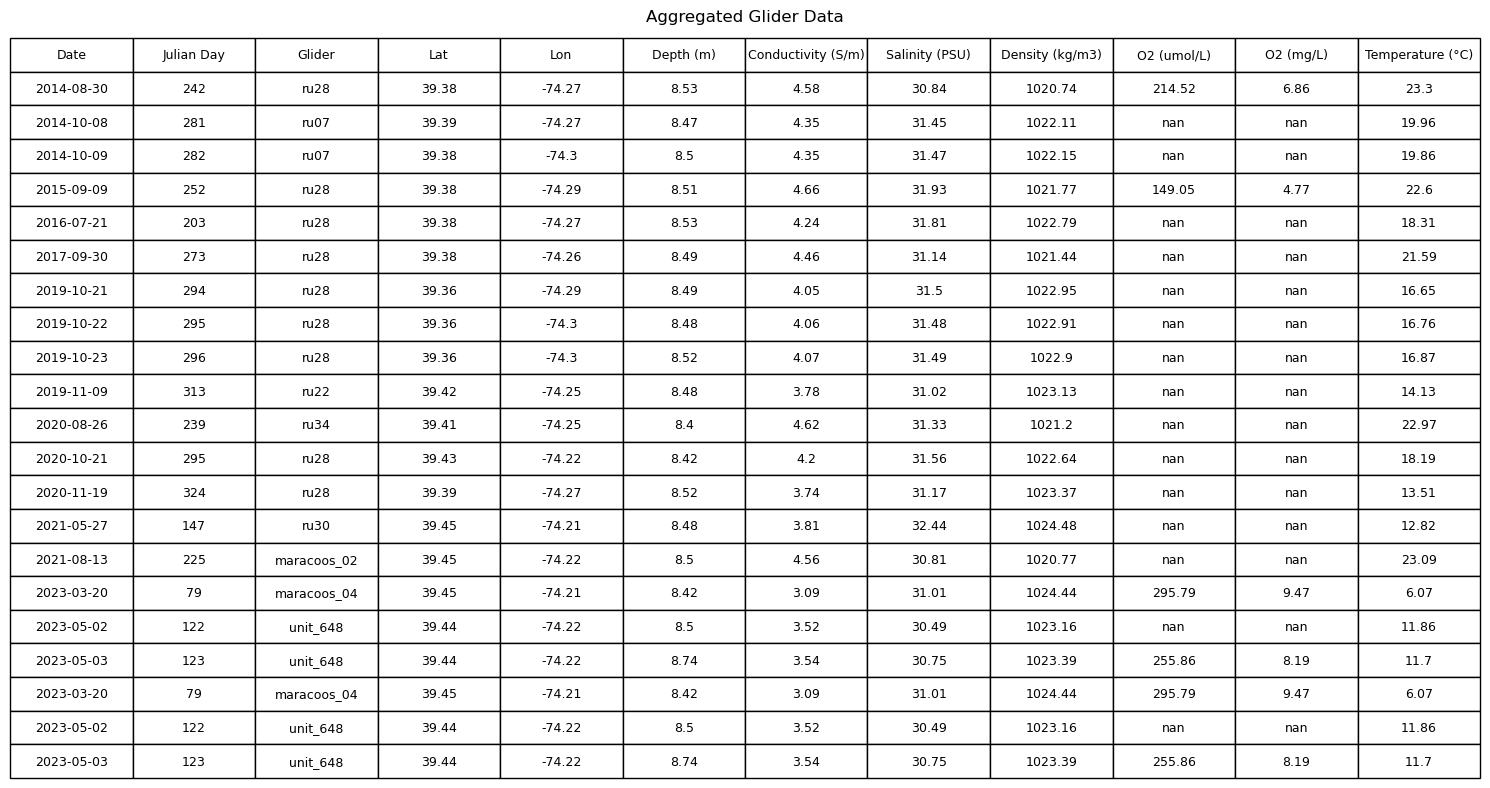

In [115]:
#taking all the glider data to make it into a figure of a table

data = {
    'Date': ['2014-08-30', '2014-10-08', '2014-10-09', '2015-09-09', '2016-07-21', '2017-09-30', '2019-10-21', '2019-10-22', '2019-10-23', '2019-11-09', '2020-08-26', '2020-10-21', '2020-11-19', '2021-05-27', '2021-08-13', '2023-03-20', '2023-05-02', '2023-05-03', '2023-03-20', '2023-05-02', '2023-05-03'],
    'Julian Day': [242, 281, 282, 252, 203, 273, 294, 295, 296, 313, 239, 295, 324, 147, 225, 79, 122, 123, 79, 122, 123],
    'Glider': ['ru28', 'ru07', 'ru07', 'ru28', 'ru28', 'ru28', 'ru28', 'ru28', 'ru28', 'ru22', 'ru34', 'ru28', 'ru28', 'ru30', 'maracoos_02', 'maracoos_04', 'unit_648', 'unit_648', 'maracoos_04', 'unit_648', 'unit_648'],
    'Lat': [39.38, 39.39, 39.38, 39.38, 39.38, 39.38, 39.36, 39.36, 39.36, 39.42, 39.41, 39.43, 39.39, 39.45, 39.45, 39.45, 39.44, 39.44, 39.45, 39.44, 39.44],
    'Lon': [-74.27, -74.27, -74.30, -74.29, -74.27, -74.26, -74.29, -74.30, -74.30, -74.25, -74.25, -74.22, -74.27, -74.21, -74.22, -74.21, -74.22, -74.22, -74.21, -74.22, -74.22],
    'Depth (m)': [8.53, 8.47, 8.50, 8.51, 8.53, 8.49, 8.49, 8.48, 8.52, 8.48, 8.40, 8.42, 8.52, 8.48, 8.50, 8.42, 8.50, 8.74, 8.42, 8.50, 8.74],
    'Conductivity (S/m)': [4.58, 4.35, 4.35, 4.66, 4.24, 4.46, 4.05, 4.06, 4.07, 3.78, 4.62, 4.20, 3.74, 3.81, 4.56, 3.09, 3.52, 3.54, 3.09, 3.52, 3.54],
    'Salinity (PSU)': [30.84, 31.45, 31.47, 31.93, 31.81, 31.14, 31.50, 31.48, 31.49, 31.02, 31.33, 31.56, 31.17, 32.44, 30.81, 31.01, 30.49, 30.75, 31.01, 30.49, 30.75],
    'Density (kg/m3)': [1020.74, 1022.11, 1022.15, 1021.77, 1022.79, 1021.44, 1022.95, 1022.91, 1022.90, 1023.13, 1021.20, 1022.64, 1023.37, 1024.48, 1020.77, 1024.44, 1023.16, 1023.39, 1024.44, 1023.16, 1023.39],
    'O2 (umol/L)': [214.52, None, None, 149.05, None, None, None, None, None, None, None, None, None, None, None, 295.79, None, 255.86, 295.79, None, 255.86],
    'O2 (mg/L)': [6.86, None, None, 4.77, None, None, None, None, None, None, None, None, None, None, None, 9.47, None, 8.19, 9.47, None, 8.19],
    'Temperature (°C)': [23.30, 19.96, 19.86, 22.60, 18.31, 21.59, 16.65, 16.76, 16.87, 14.13, 22.97, 18.19, 13.51, 12.82, 23.09, 6.07, 11.86, 11.70, 6.07, 11.86, 11.70]
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 8))
plt.axis('off')
plt.suptitle('Aggregated Glider Data')

# Creating the table
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                #   colWidths=[3] * len(df.columns),
                  bbox=[0, 0, 1, 1])

# Adjusting font size
table.auto_set_font_size(False)
table.set_fontsize(9)

plt.tight_layout()
plt.show()

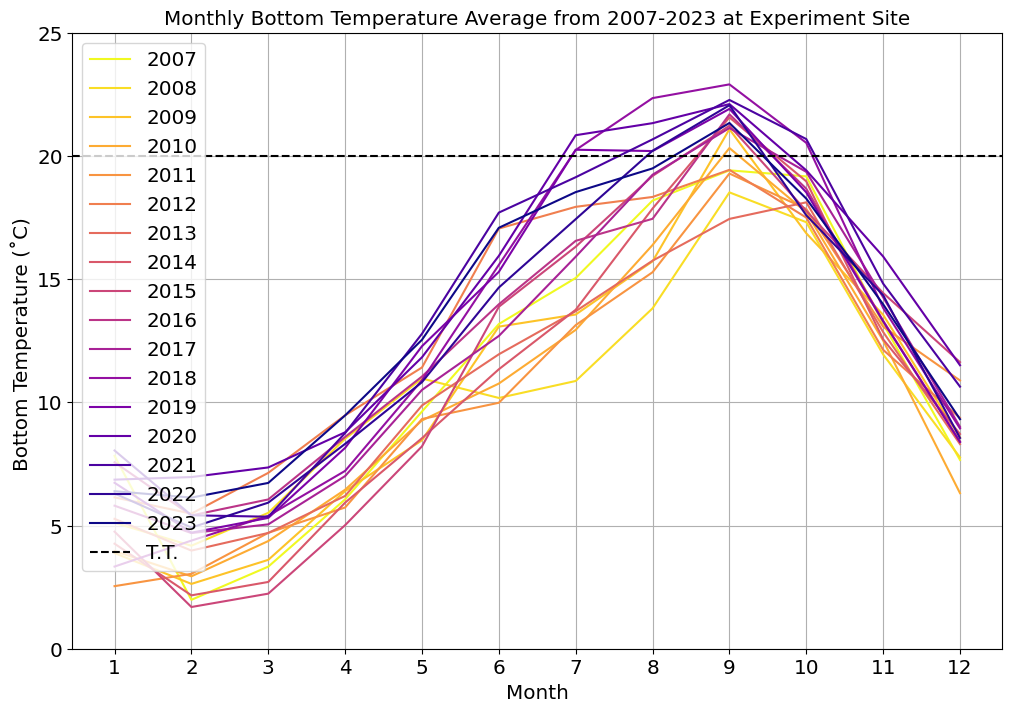

In [116]:
#look at ROMS again

cmap = plt.get_cmap('plasma_r')

fig=plt.figure(figsize=[12,8])

for year in range(2007, 2024):
    plt.plot(gb_year[year].month, gb_year[year].temp, label=str(year), color=cmap((year-2007)/(2023-2007)))

plt.grid(True)
plt.xticks(np.arange(1, 13, 1))
plt.axhline(y=20, color='black', linestyle='--', label='T.T.')
plt.title("Monthly Bottom Temperature Average from 2007-2023 at Experiment Site")
plt.xlabel("Month")
plt.ylabel("Bottom Temperature (˚C) ");
plt.ylim(0,25)
plt.legend()
plt.show()


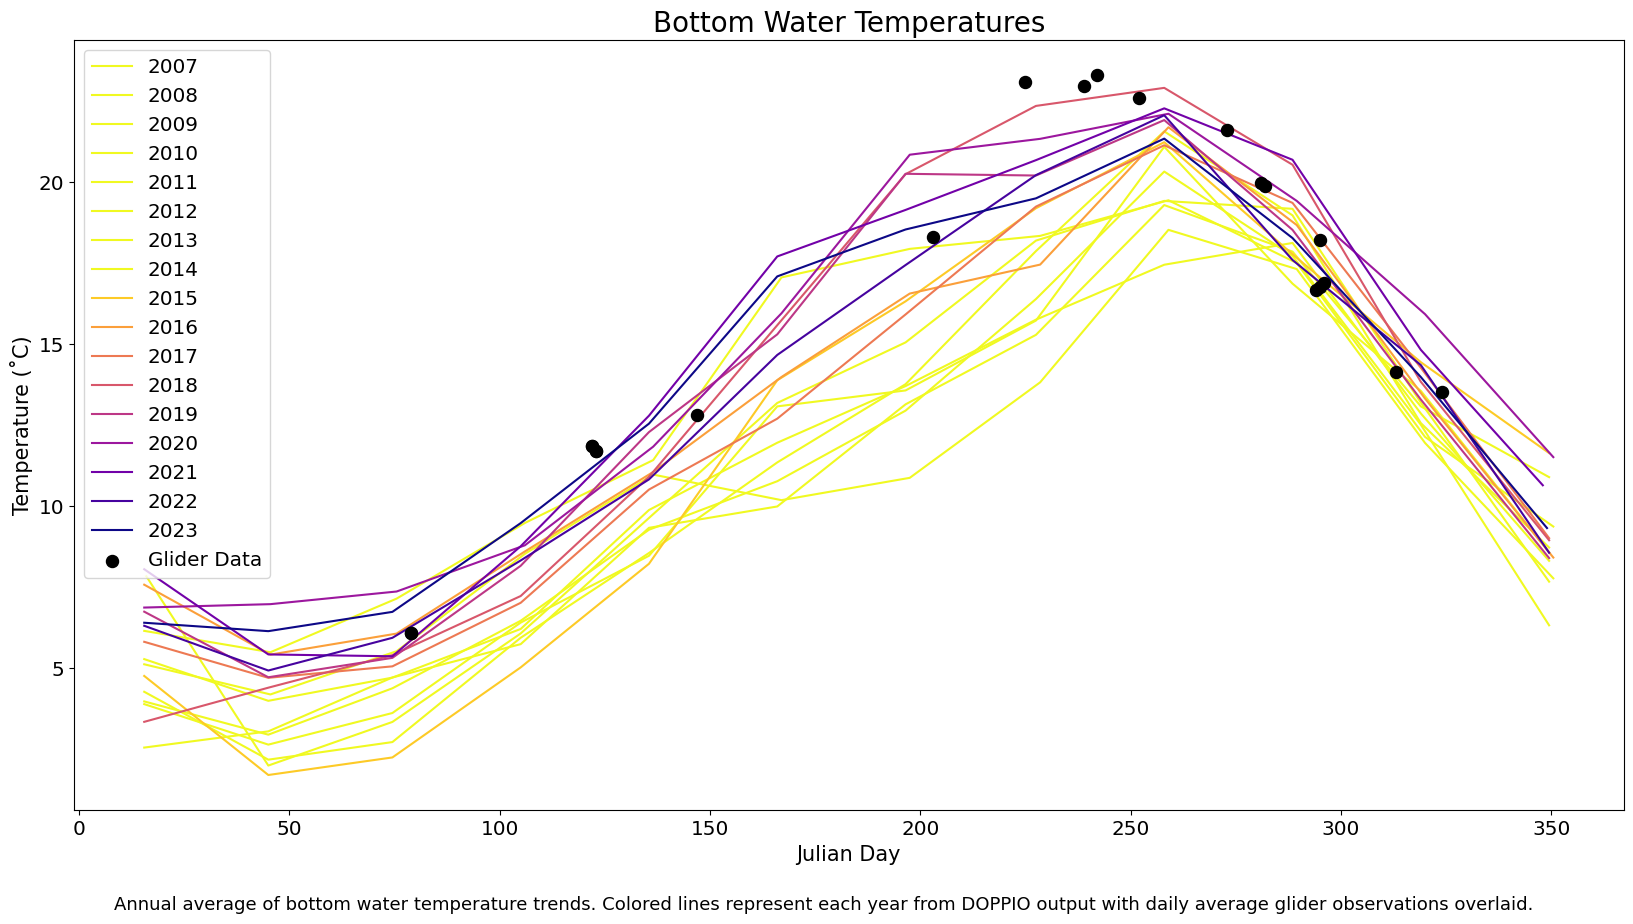

In [137]:
#DOPPIO + gliders

# Define a custom colormap
colors = plt.cm.plasma_r(np.linspace(0, 1, 10))
custom_cmap = plt.cm.colors.ListedColormap(colors)

fig, ax1 = plt.subplots(figsize=[20, 10])

# Plotting DOPPIO output
for year, group in gb_year:
    # Calculate Julian Day for each DOPPIO output
    base_date = np.datetime64(str(year) + '-01-01')
    group['day_of_year'] = (group.ocean_time - base_date) / np.timedelta64(1, 'D')
    ax1.plot(group['day_of_year'], group['temp'], label=str(year), color=custom_cmap(year - 2014))

# Plotting glider data
ax1.scatter(all_gliders['day_of_year'], all_gliders['temperature'], color='black', label='Glider Data', s=75, zorder=3)

ax1.set_xlabel("Julian Day", fontsize=15)
ax1.set_ylabel("Temperature (˚C)", fontsize=15)
ax1.legend(loc='upper left')
fig.text(0.5, 0.01, 'Annual average of bottom water temperature trends. Colored lines represent each year from DOPPIO output with daily average glider observations overlaid.', ha='center', fontsize=13)

plt.title("Bottom Water Temperatures", fontsize=20)
plt.show()

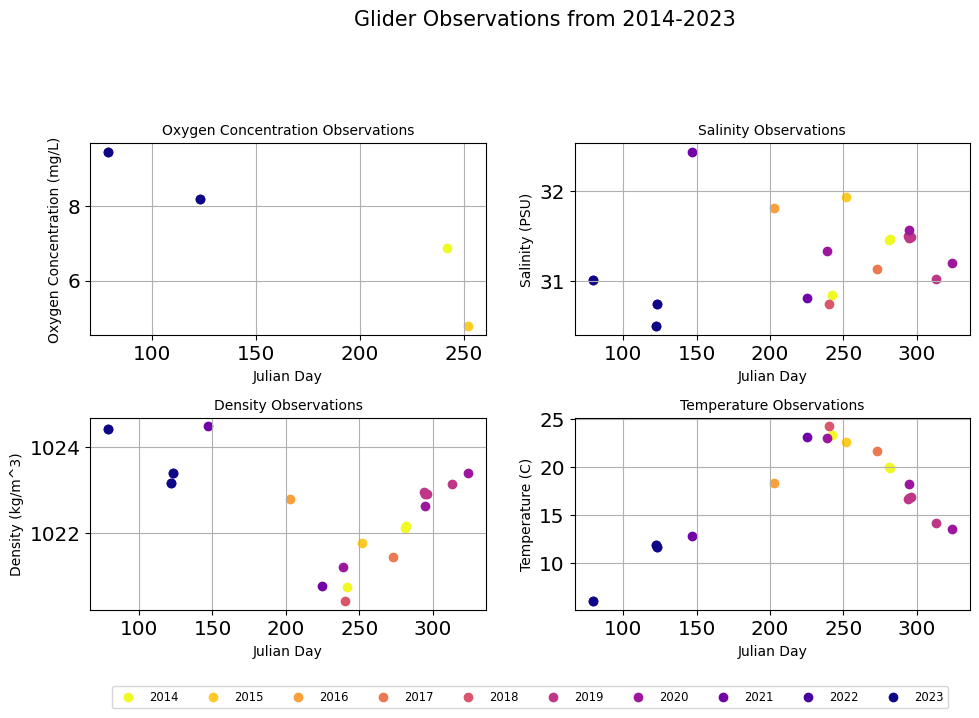

In [118]:
#let's look at 2x2 subplots of our research interest areas 

# Define years and colormap
years = range(2014, 2024)
cmap = plt.get_cmap('plasma_r')
norm = Normalize(vmin=min(years), vmax=max(years))
sm = ScalarMappable(norm=norm, cmap=cmap)

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

plt.suptitle('Glider Observations from 2014-2023', fontsize=15)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(True)
        ax.set_xlabel('Julian Day', fontsize=10)

# Oxygen Concentration
axs[0, 0].set_ylabel('Oxygen Concentration (mg/L)', fontsize=10)
axs[0, 0].set_title('Oxygen Concentration Observations', fontsize=10)
for year in years:
    if f'gliders{year}' in globals() and 'oxygen_concentration_mg_per_l' in globals()[f'gliders{year}']:
        data = globals()[f'gliders{year}']
        color = sm.to_rgba(year)
        axs[0, 0].scatter(data['day_of_year'], data['oxygen_concentration_mg_per_l'], color=color, label=str(year))

# Salinity
axs[0, 1].set_ylabel('Salinity (PSU)', fontsize=10)
axs[0, 1].set_title('Salinity Observations', fontsize=10)
for year in years:
    if f'gliders{year}' in globals() and 'salinity' in globals()[f'gliders{year}']:
        data = globals()[f'gliders{year}']
        color = sm.to_rgba(year)
        axs[0, 1].scatter(data['day_of_year'], data['salinity'], color=color, label=str(year))

# Density
axs[1, 0].set_ylabel('Density (kg/m^3)', fontsize=10)
axs[1, 0].set_title('Density Observations', fontsize=10)
for year in years:
    if f'gliders{year}' in globals() and 'density' in globals()[f'gliders{year}']:
        data = globals()[f'gliders{year}']
        color = sm.to_rgba(year)
        axs[1, 0].scatter(data['day_of_year'], data['density'], color=color, label=str(year))

# Temperature
axs[1, 1].set_ylabel('Temperature (C)', fontsize=10)
axs[1, 1].set_title('Temperature Observations', fontsize=10)
for year in years:
    if f'gliders{year}' in globals() and 'temperature' in globals()[f'gliders{year}']:
        data = globals()[f'gliders{year}']
        color = sm.to_rgba(year)
        axs[1, 1].scatter(data['day_of_year'], data['temperature'], color=color, label=str(year))

# Plot years at the bottom in a legend
legend_ax = fig.add_subplot(111, frameon=False)
legend_ax.axis('off')
for year in years:
    legend_ax.scatter([], [], color=sm.to_rgba(year), label=str(year))

legend_ax.legend(scatterpoints=1, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(years), fontsize='small')


# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()


In [119]:
#pull all urls so we can plot tracks

all_urls = {
    2014: urls2014,
    2015: urls2015,
    2016: urls2016,
    2017: urls2017,
    2018: urls2018,
    2019: urls2019,
    2020: urls2020,
    2021: urls2021,
    2022: urls2022,
    2023: urls2023
}


In [120]:
#create the dataset

unedited_gliders = pd.concat([all_data_2014, all_data_2015, all_data_2016, all_data_2017, all_data_2018, all_data_2019, all_data_2020, all_data_2021, all_data_2022, all_data_2023])
unedited_gliders

time   latitude  longitude     depth  \
36           2014-10-02 00:00:32+00:00  38.889311 -74.537377  9.636359   
38           2014-10-02 00:00:34+00:00  38.889313 -74.537379  9.259250   
41           2014-10-02 00:00:36+00:00  38.889314 -74.537381  8.852367   
43           2014-10-02 00:00:38+00:00  38.889316 -74.537383  8.425636   
46           2014-10-02 00:00:40+00:00  38.889317 -74.537385  8.028677   
...                                ...        ...        ...       ...   
40100 2023-05-03 13:15:05.100000+00:00  39.443936 -74.206026  7.929040   
40103 2023-05-03 13:15:13.170000+00:00  39.443936 -74.206023  9.308403   
40115 2023-05-03 13:16:10.460000+00:00  39.443938 -74.206008  9.735110   
40116 2023-05-03 13:16:18.500000+00:00  39.443938 -74.206006  8.325979   
40118 2023-05-03 13:16:26.550000+00:00  39.443938 -74.206004  7.006151   

                   trajectory  conductivity     density  oxygen_concentration  \
36         ru07-20140918T1310       4.52257  1022.25840                   NaN   
38         ru07-20140918T1310       4.52262  1022.25790                   NaN   
41         ru07-20140918T1310       4.52257  1022.25244                   NaN   
43         ru07-20140918T1310       4.52250  1022.25000                   NaN   
46         ru07-20140918T1310       4.52232  1022.24536                   NaN   
...                       ...           ...         ...                   ...   
40100  unit_648-20230324T1507       3.51642  1023.12030               258.427   
40103  unit_648-20230324T1507       3.52046  1023.22424               258.701   
40115  unit_648-20230324T1507       3.51521  1023.24080               254.678   
40116  unit_648-20230324T1507       3.51824  1023.20416               254.501   
40118  unit_648-20230324T1507       3.51101  1022.99700               254.689   

       oxygen_saturation   salinity  temperature  
36                   NaN  32.010850      21.0342  
38                   NaN  32.012043      21.0333  
41                   NaN  32.008710      21.0374  
43                   NaN  32.008070      21.0377  
46                   NaN  32.005054      21.0400  
...                  ...        ...          ...  
40100                NaN  30.443466      11.8504  
40103                NaN  30.550056      11.7671  
40115                NaN  30.553614      11.7010  
40116                NaN  30.529720      11.7663  
40118                NaN  30.312603      11.9477  

[395019 rows x 11 columns]

In [121]:
#make a mask

p = path.Path(box_intersect.T) 
mask = p.contains_points(np.array([unedited_gliders.longitude,unedited_gliders.latitude]).T)

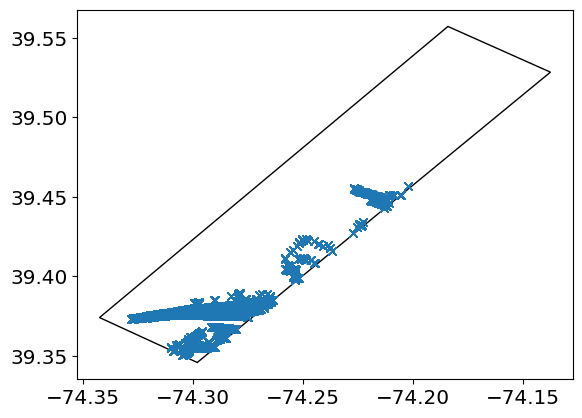

In [122]:
#plot them all!

plt.plot(unedited_gliders.longitude[mask],unedited_gliders.latitude[mask],'x')
plt.fill(box_intersect[0,:],box_intersect[1,:], facecolor='none', edgecolor = 'k')

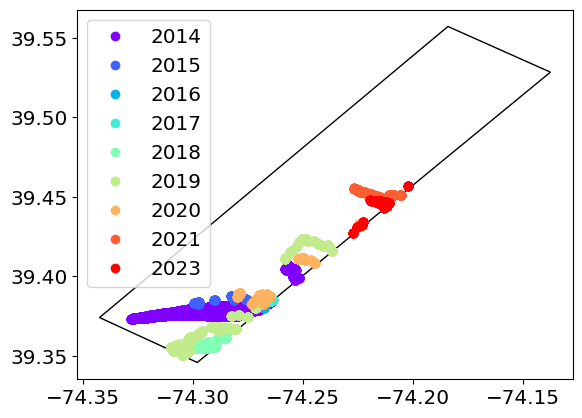

In [123]:
#RUN THROUGH AGAIN

# Concatenate all glider data
unedited_gliders = pd.concat([all_data_2014, all_data_2015, all_data_2016, all_data_2017, all_data_2018, all_data_2019, all_data_2020, all_data_2021, all_data_2022, all_data_2023])

# Assuming box_intersect is defined somewhere
p = path.Path(box_intersect.T) 

# Get unique years
years = unedited_gliders['time'].dt.year.unique()

# Define a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(years)))

# Plot each glider track separately with a different color
for i, year in enumerate(years):
    glider_data = unedited_gliders[unedited_gliders['time'].dt.year == year]
    mask = p.contains_points(np.array([glider_data.longitude, glider_data.latitude]).T)
    plt.plot(glider_data.longitude[mask], glider_data.latitude[mask], 'o', color=colors[i], label=f'{year}')

# Fill the box intersect
plt.fill(box_intersect[0, :], box_intersect[1, :], facecolor='none', edgecolor='k')

# Add legend
plt.legend()

# Show plot
plt.show()


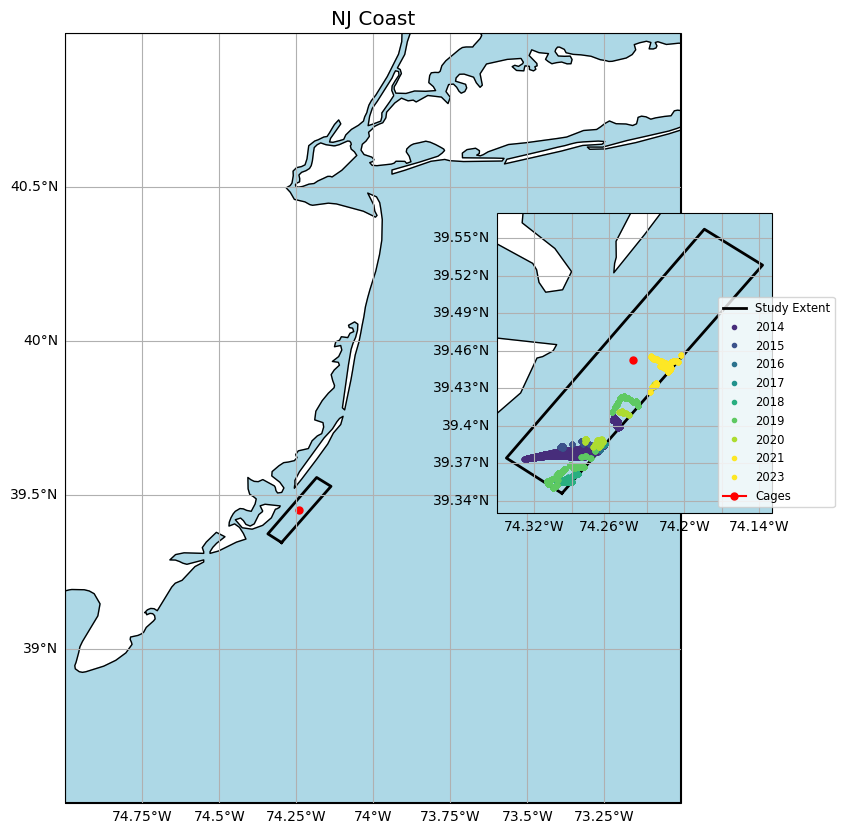

In [124]:
#let's make a plot of our study area + glider tracks

# Create figure and axes for the big map
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set extent to cover New Jersey
ax1.set_extent([-75, -73, 38.5, 41])

# Add coastline, state boundaries, and ocean
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.OCEAN, color='lightblue')

# Plot New Jersey
ax1.plot([-75, -73, -73, -75, -75], [38.5, 38.5, 41, 41, 38.5], color='black', transform=ccrs.PlateCarree())

# Plot the study area box on the NJ coast graph
ax1.plot([-74.2979018729364, -74.1374115693204, -74.18398241635184, -74.34232329625868, -74.2979018729364],
         [39.34574938159044, 39.528354620427535, 39.557085111198106, 39.37400145851776, 39.34574938159044],
         color='black', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Mark the center
ax1.plot(-74.24087, 39.4524, marker='o', markersize=5, color='red', label='Clams')

# Add title for ax1
ax1.set_title('NJ Coast')

# Add latitude and longitude gridlines
gl1 = ax1.gridlines(draw_labels=True)
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER

# Create a second set of axes for the study area map
ax2 = fig.add_axes([0.53, 0.4, 0.4, 0.3], projection=ccrs.PlateCarree())

# Set extent for the study area map
ax2.set_extent([-74.35, -74.13, 39.33, 39.57])

# Add coastline, state boundaries, and ocean for the study area map
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.OCEAN, color='lightblue')

# Plot the study area box
ax2.plot([-74.2979018729364, -74.1374115693204, -74.18398241635184, -74.34232329625868, -74.2979018729364],
         [39.34574938159044, 39.528354620427535, 39.557085111198106, 39.37400145851776, 39.34574938159044],
         color='black', label='Study Extent', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())

# Define a colormap
colors = cm.get_cmap('viridis', len(years))

# Remove the lightest shade
colors = colors(np.linspace(0.2, 1, len(years)))

# Plot each glider track separately with a different color
for i, year in enumerate(years):
    glider_data = unedited_gliders[unedited_gliders['time'].dt.year == year]
    mask = p.contains_points(np.array([glider_data.longitude, glider_data.latitude]).T)
    ax2.plot(glider_data.longitude[mask], glider_data.latitude[mask], '.', color=colors[i], label=f'{year}')

# Mark the center for the study area map
ax2.plot(-74.24087, 39.4524, marker='o', markersize=5, color='red', label='Cages')

# Add legend for the study area map
ax2.legend(loc='lower right', fontsize='small', bbox_to_anchor=(1.25, 0.0))

# Add latitude and longitude gridlines
gl2 = ax2.gridlines(draw_labels=True)
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER

plt.show()